# Benchmark Analysis Viewer

**Purpose**: View pre-generated benchmark analysis results.

**Quick Start**:
1. Generate benchmarks: `python grid_cli.py generate ...`
2. Generate analysis: `python generate_reports.py results/<version>`
3. Set `benchmark_version` and `task` below
4. Run cells to view figures and tables

**Old Notebook**: Backed up as `grid_analysis_OLD.ipynb` (1700 lines, kept for reference)

**New Workflow**: Analysis logic moved to Python modules, this notebook just displays results.

## ⚙️ Configuration - Select Benchmark to Analyze

**Change `benchmark_folder` below to switch between benchmarks.**

All cells will automatically adapt to show the selected benchmark's results.

In [1]:
from pathlib import Path
import sys

# ============================================================
# 🎯 CONFIGURATION: Change this to view different benchmarks
# ============================================================
# Options: "test", "pch_test", "v1_baseline", etc.
# benchmark_folder = "test"  
benchmark_folder = "both_ramp_test"  
# ============================================================

# Setup paths
repo_root = Path.cwd().parent.parent if Path.cwd().name == "notebooks" else Path.cwd().parent if Path.cwd().name == "benchmarks" else Path.cwd()
sys.path.insert(0, str(repo_root / "benchmarks"))

# Set up paths based on selected benchmark
results_dir = repo_root / "benchmarks/results" / benchmark_folder / "raw"
processed_dir = repo_root / "benchmarks/results" / benchmark_folder / "processed"

# Auto-detect ALL tasks from available JSONL files
jsonl_files = list(results_dir.glob("*.jsonl"))
if not jsonl_files:
    print(f"❌ No JSONL files found in {results_dir}")
    available = [d.name for d in (repo_root / 'benchmarks/results').iterdir() if d.is_dir() and not d.name.startswith('.')]
    print(f"   Available benchmarks: {available}")
else:
    # Detect all tasks present in this benchmark folder
    tasks_found = {}
    for jsonl_file in jsonl_files:
        # Extract task from filename (e.g., "Tsh_2x2_test.jsonl" -> "Tsh")
        filename = jsonl_file.name
        for task_name in ['both', 'Tsh', 'Pch']:  # Check 'both' first
            if task_name in filename:
                tasks_found[task_name] = jsonl_file
                break
    
    print(f"✅ Benchmark: {benchmark_folder}")
    print(f"✅ Tasks found: {list(tasks_found.keys())}")
    print(f"📁 Raw data: {results_dir}")
    print(f"📊 Processed: {processed_dir}")
    
    # Create task-specific variables for easy access
    if len(tasks_found) == 1:
        # Single task - use simple variables
        task = list(tasks_found.keys())[0]
        jsonl_file = tasks_found[task]
        figures_dir = processed_dir.parent / f"figures/{task}"
        print(f"🖼️  Figures: {figures_dir}")
    else:
        # Multiple tasks - create dictionaries
        task = None  # Will need to specify which task to view
        jsonl_file = None
        figures_dirs = {t: processed_dir.parent / f"figures/{t}" for t in tasks_found.keys()}
        print(f"🖼️  Figures:")
        for t, fdir in figures_dirs.items():
            print(f"     {t}: {fdir}")
    
    print(f"📄 Files: {[f.name for f in jsonl_files]}")

✅ Benchmark: both_ramp_test
✅ Tasks found: ['both']
📁 Raw data: /home/bernalde/repos/LyoPRONTO/benchmarks/results/both_ramp_test/raw
📊 Processed: /home/bernalde/repos/LyoPRONTO/benchmarks/results/both_ramp_test/processed
🖼️  Figures: /home/bernalde/repos/LyoPRONTO/benchmarks/results/both_ramp_test/figures/both
📄 Files: ['both_3x3_ramp.jsonl']


**How to use:**
1. After running `generate_reports.py`, it will tell you what to set for `benchmark_folder`
2. Update `benchmark_folder` in the configuration cell above
3. If multiple tasks exist (Tsh, Pch, both), select which one to view in the next cell
4. Run all cells below - they automatically adapt to your selected benchmark and task

**Example workflow:**
```bash
# Generate multiple benchmarks in one folder
python grid_cli.py generate --task Tsh --scenario baseline ... --out results/multi/raw/Tsh_3x3.jsonl
python grid_cli.py generate --task Pch --scenario baseline ... --out results/multi/raw/Pch_3x3.jsonl
python grid_cli.py generate --task both --scenario baseline ... --out results/multi/raw/both_3x3.jsonl

# Analyze all tasks in the folder
python generate_reports.py benchmarks/results/multi/raw --output benchmarks/results/multi
```

Then set `benchmark_folder = "multi"` and choose which task to view!

## Select Task (if multiple tasks found)

If the benchmark contains multiple tasks (Tsh, Pch, both), select which one to view:

In [2]:
# If multiple tasks are present, select which one to view
if 'tasks_found' in locals() and len(tasks_found) > 1:
    print(f"Multiple tasks found: {list(tasks_found.keys())}")
    print("\n📌 Select task to view (uncomment one):")
    print("# selected_task = 'Tsh'")
    print("# selected_task = 'Pch'")
    print("# selected_task = 'both'")
    
    # Set the selected task here:
    selected_task = list(tasks_found.keys())[0]  # Default to first task
    
    # Update variables for selected task
    task = selected_task
    jsonl_file = tasks_found[task]
    figures_dir = figures_dirs[task]
    
    print(f"\n✅ Viewing task: {task}")
    print(f"🖼️  Figures: {figures_dir}")
elif 'task' in locals() and task is not None:
    print(f"✅ Single task found: {task}")
    print("   (No selection needed - all cells below will use this task)")
else:
    print("❌ No tasks detected. Check the configuration cell above.")

✅ Single task found: both
   (No selection needed - all cells below will use this task)


**Available benchmarks:**
- `test` - Tsh optimization test (2×2 grid, single task)
- `pch_test` - Pch optimization test (2×2 grid, single task)
- `v1_baseline` - Multiple tasks (Tsh, Pch, both with 3×3 grids)

**Multi-task support:**
- A single benchmark folder can contain Tsh, Pch, and/or both optimizations
- The notebook auto-detects all tasks and lets you select which one to view
- All visualizations adapt to the selected task automatically

## Load Benchmark Data

Load the selected benchmark's JSONL file and organize by method.

In [3]:
from src.data_loader import load_benchmark_jsonl, organize_by_method, extract_parameter_grid

# Load data from the selected task
if 'jsonl_file' in locals() and jsonl_file is not None:
    print(f"✓ Loading: {jsonl_file.name}")
    print(f"✓ Task: {task}")
    
    # Load data
    records = load_benchmark_jsonl(jsonl_file)
    by_method = organize_by_method(records)
    param_info = extract_parameter_grid(records)
    
    print(f"\n✓ Total records: {len(records)}")
    print(f"  - Scipy: {len(by_method['scipy'])}")
    for method in by_method.keys():
        if method != 'scipy':
            method_name = method.upper() if len(method) <= 3 else method.capitalize()
            print(f"  - {method_name}: {len(by_method[method])}")
    
    print(f"\n✓ Parameter grid:")
    for name, values in param_info.items():
        print(f"  - {name}: {values}")
else:
    print("❌ No task selected. Check the cells above.")

✓ Loading: both_3x3_ramp.jsonl
✓ Task: both

✓ Total records: 18
  - Scipy: 18
  - FD: 9
  - Colloc: 9

✓ Parameter grid:
  - param1_name: product.R0
  - param1_values: [0.4 0.6 0.8]
  - param2_name: product.A1
  - param2_values: [ 5.  12.5 20. ]


### JSONL Schema & Constraint Metrics

Each benchmark record is a JSON object (schema v2). Key top-level fields:
- `task`: One of `Tsh`, `Pch`, `both`
- `product_params`: Dict of varied product parameters
- `scipy`: Baseline solution summary (always present)
- `pyomo`: Optimization summary (only if Pyomo run attempted)

Pyomo block structure:
- `success`: Solver-based success flag (pre-validation)
- `solver`: IPOPT status fields (`status`, `termination_condition`, `wall_time_s`, etc.)
- `discretization`: Mesh metadata (`method`, `n_elements_applied`, `n_collocation`, `total_mesh_points`)
- `metrics`: Added constraint validation metrics (absent if validation not run)

Constraint validation metrics (boolean flags + magnitudes):
- `constraints_satisfied`: True only if all checks pass
- `dryness_ok`: True if final dried fraction ≥ target (e.g., 0.99)
- `temperature_ok`: True if max product temperature (Tsub) ≤ critical limit (`T_pr_crit`)
- `ramp_Tsh_ok`: True if max |dTsh/dt| ≤ configured `--ramp-Tsh-max` (if provided)
- `ramp_Pch_ok`: True if max |dPch/dt| ≤ configured `--ramp-Pch-max` (if provided)
- Violation magnitudes:
  - `max_Tsh_ramp_violation` (°C/hr)
  - `max_Pch_ramp_violation` (Torr/hr)
  - `final_frac_dried` (fraction 0–1)
  - `max_Tsub` (°C)

Interpretation:
- A Pyomo run with `success=True` but `constraints_satisfied=False` is marked failed downstream.
- Missing ramp flags means no ramp limit was specified for that control.
- Use the summary cell below to aggregate pass/fail counts by discretization method.

Timeout Note:
- `--solver-timeout` maps to IPOPT `max_cpu_time` (CPU seconds, not wall clock). Long wall times can exceed this on heavy evaluations.


## Objective Difference Heatmaps

Percentage difference in drying time: `100 × (pyomo - scipy) / scipy`

- Negative (blue/green): Pyomo faster
- Positive (red/orange): Pyomo slower
- White cells: Failed optimization

**Note**: Separate heatmaps for FD and Collocation methods for better scalability.

In [ ]:
# Constraint metrics summary (aggregated)
from collections import Counter

if 'records' in locals():
    pyomo_records = [r for r in records if 'pyomo' in r and isinstance(r['pyomo'], dict)]
    metric_rows = []
    for r in pyomo_records:
        m = r['pyomo'].get('metrics', {}) or {}
        metric_rows.append({
            'method': r['pyomo'].get('discretization', {}).get('method'),
            'success_solver': r['pyomo'].get('success'),
            'constraints_satisfied': m.get('constraints_satisfied'),
            'dryness_ok': m.get('dryness_ok'),
            'temperature_ok': m.get('temperature_ok'),
            'ramp_Tsh_ok': m.get('ramp_Tsh_ok'),
            'ramp_Pch_ok': m.get('ramp_Pch_ok'),
        })
    if metric_rows:
        import pandas as pd
        df_metrics = pd.DataFrame(metric_rows)
        print('✓ Constraint Metrics Summary')
        print(df_metrics.groupby('method')[['constraints_satisfied','dryness_ok','temperature_ok','ramp_Tsh_ok','ramp_Pch_ok']].sum())
        print('\nCounts per method:')
        print(df_metrics['method'].value_counts())
    else:
        print('⚠️ No Pyomo metric rows found (perhaps only scipy baseline present).')
else:
    print('❌ Records not loaded yet. Run data load cell first.')


✓ Objective Difference Heatmaps (% difference vs scipy)

  FD:


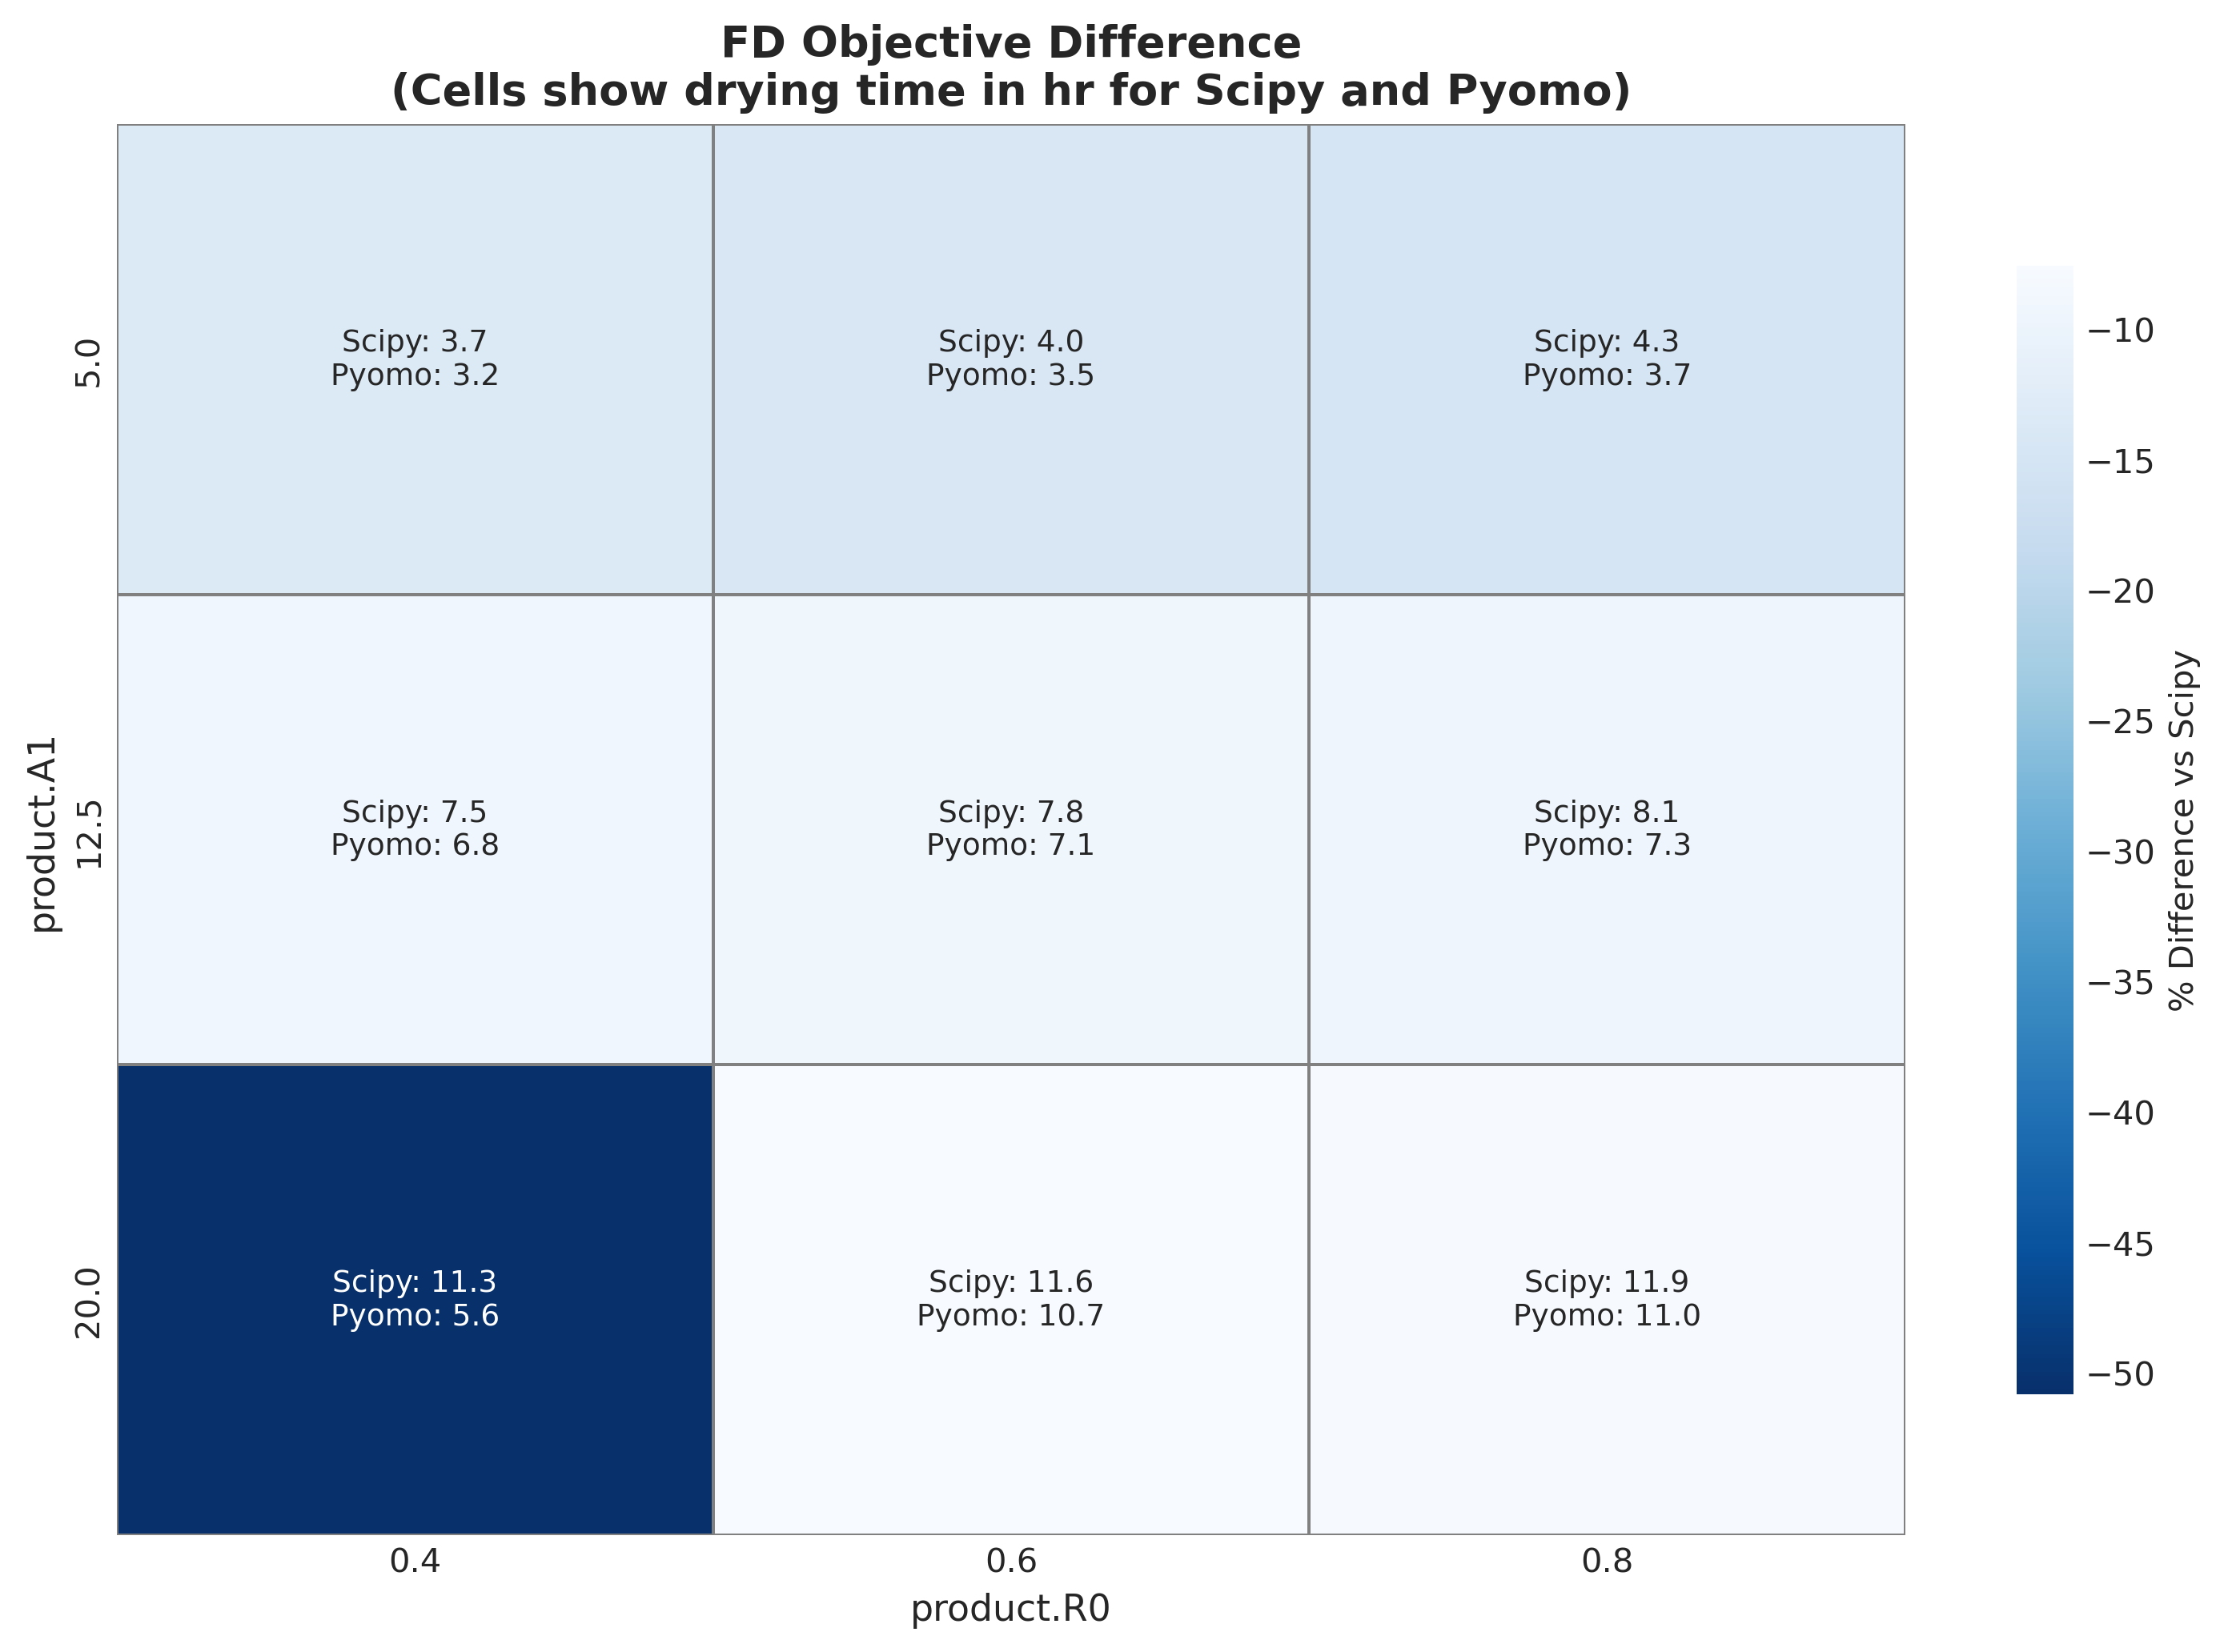

  Collocation:


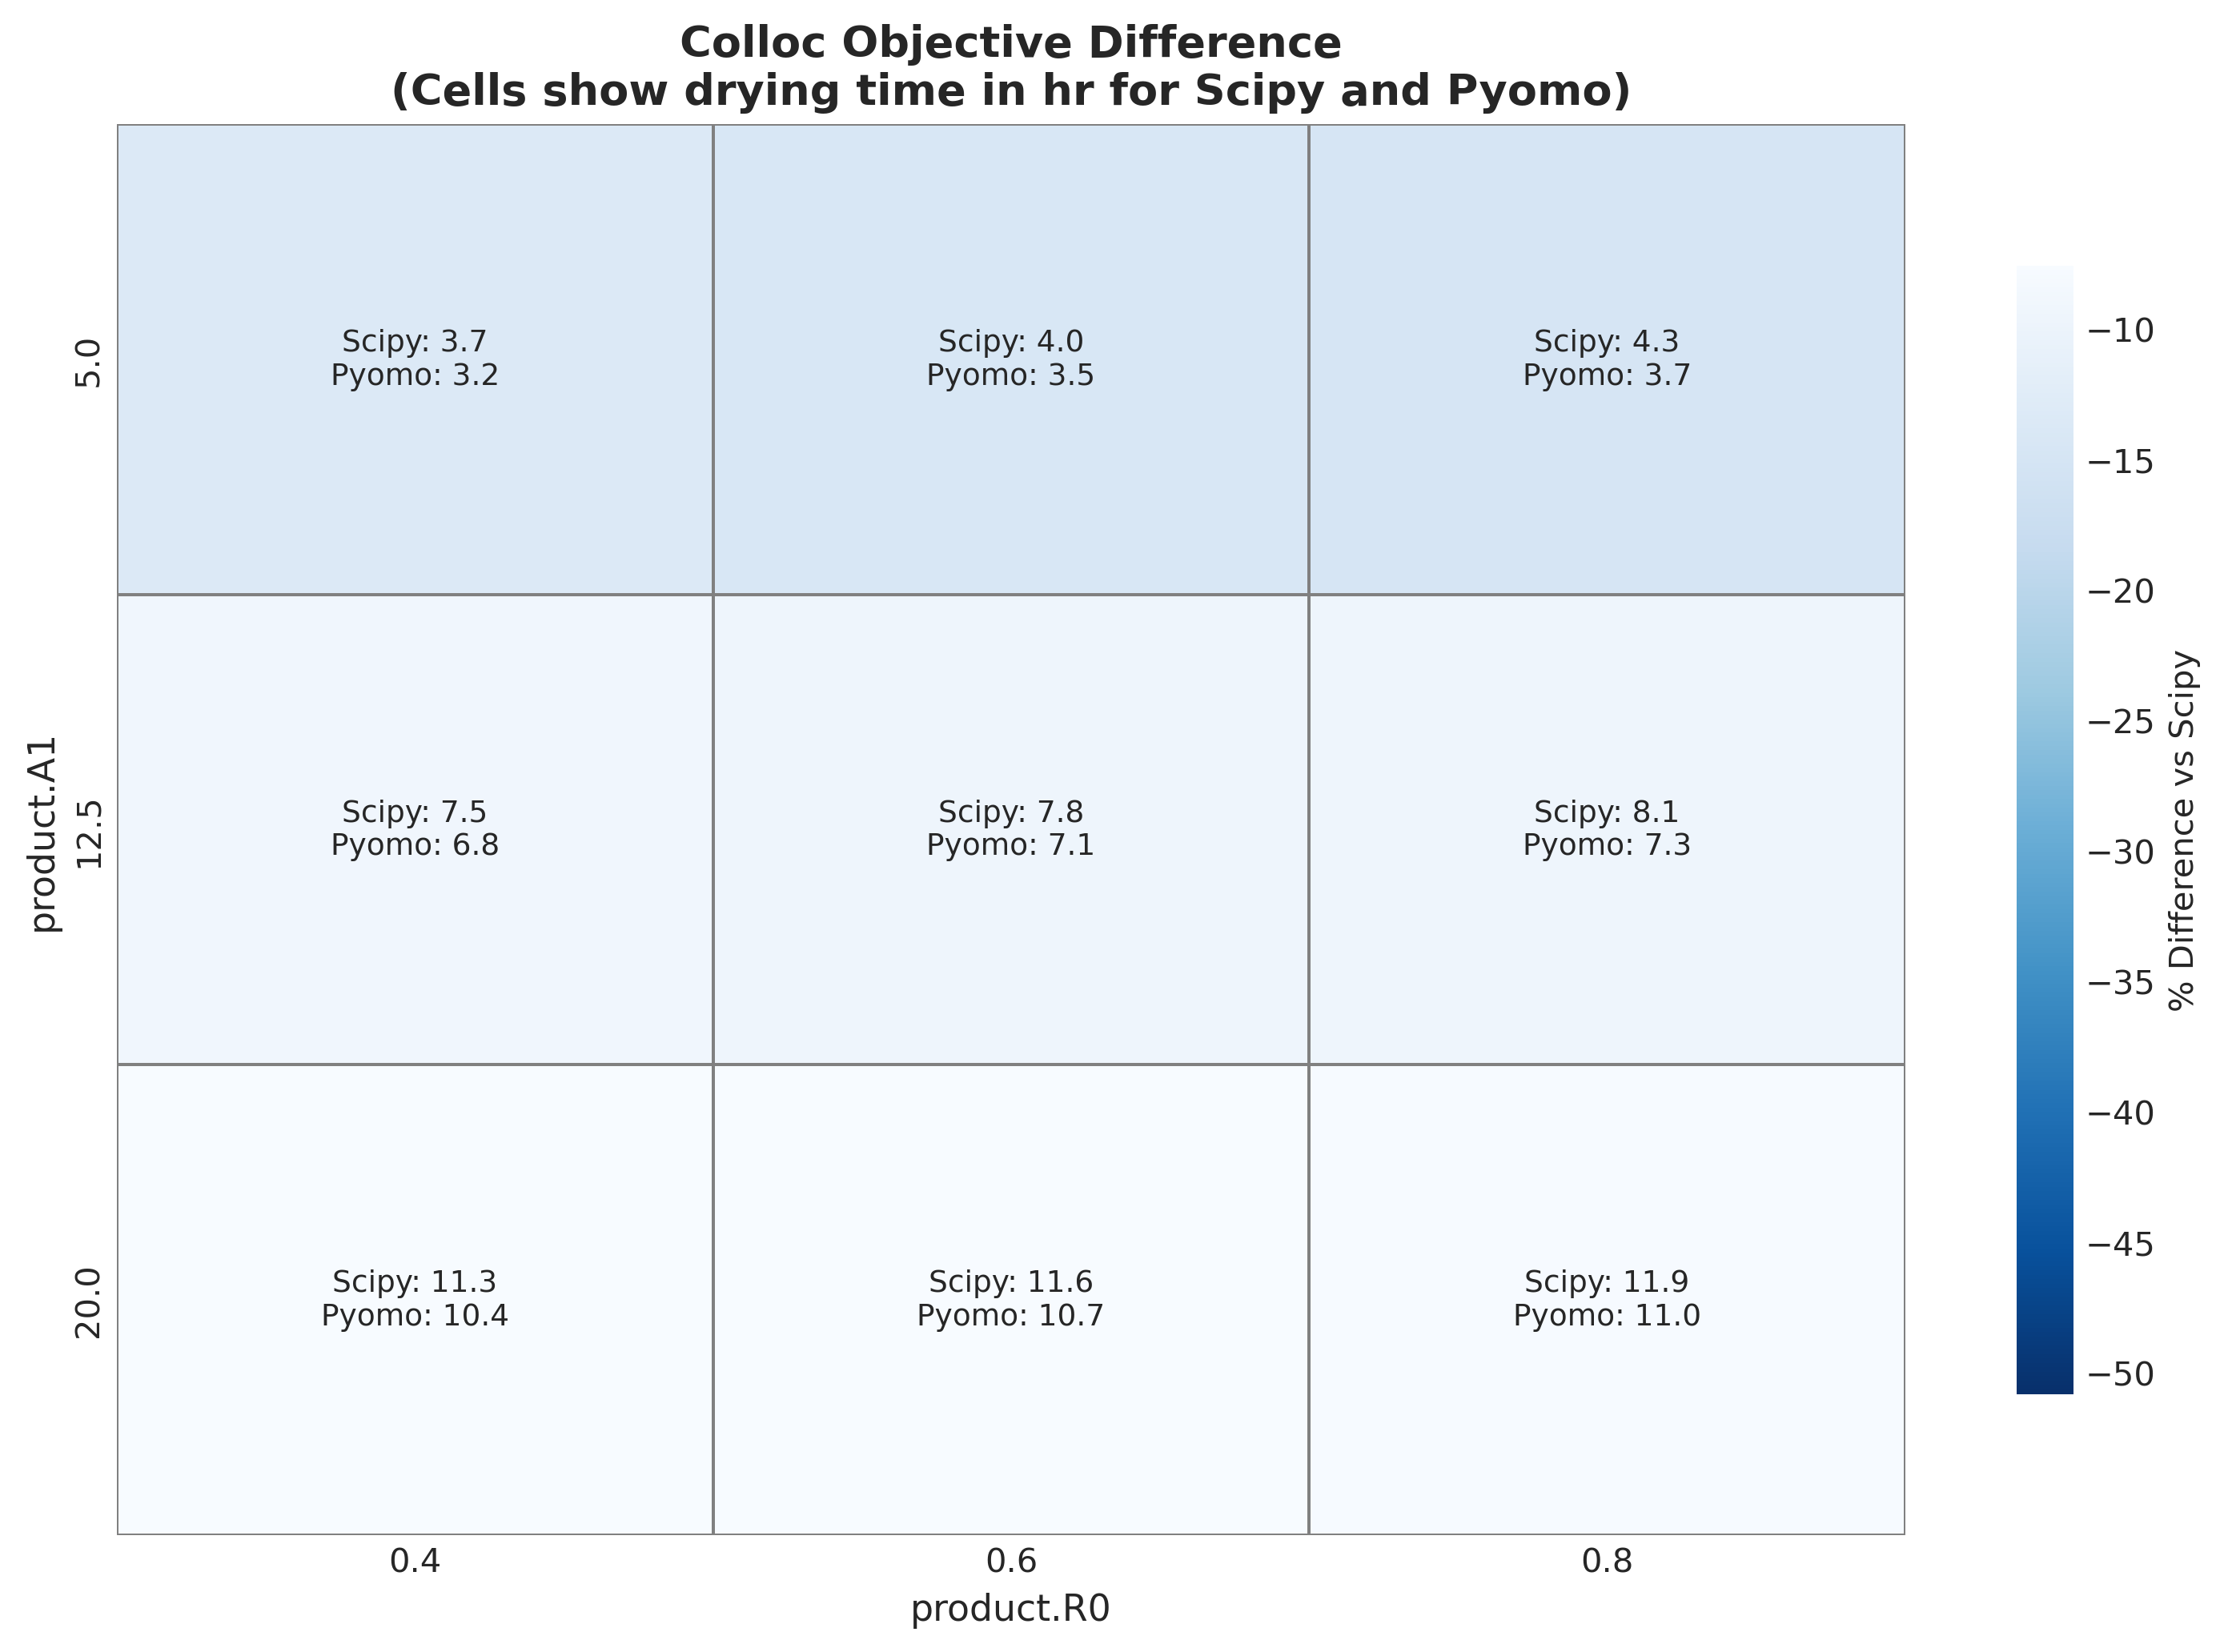

In [4]:
from IPython.display import Image, display

# Objective difference heatmaps - dynamically discover which methods are present
print("✓ Objective Difference Heatmaps (% difference vs scipy)\n")

# Check which Pyomo methods are present in the benchmark data
for method in by_method.keys():
    if method == 'scipy':  # Skip scipy baseline
        continue
    if len(by_method[method]) > 0:
        # Capitalize method name for display (fd -> FD, colloc -> Collocation)
        method_name = {'fd': 'FD', 'colloc': 'Collocation'}.get(method, method.upper())
        heatmap_file = figures_dir / f'objective_diff_heatmap_{method}.png'
        if heatmap_file.exists():
            print(f"  {method_name}:")
            display(Image(filename=str(heatmap_file)))
        else:
            print(f"  ⚠️  {method_name}: heatmap not generated")
            print(f"     Run: python scripts/generate_reports.py {get_results_dir(benchmark_version)}")


## Speedup Heatmaps

Wall clock speedup: `scipy_time / pyomo_time`

- Values > 1: Pyomo faster
- Values < 1: Scipy faster
- White cells: Failed optimization

**Note**: Separate heatmaps for FD and Collocation methods for better scalability.

✓ Speedup Heatmaps (scipy_time / pyomo_time)

  FD:


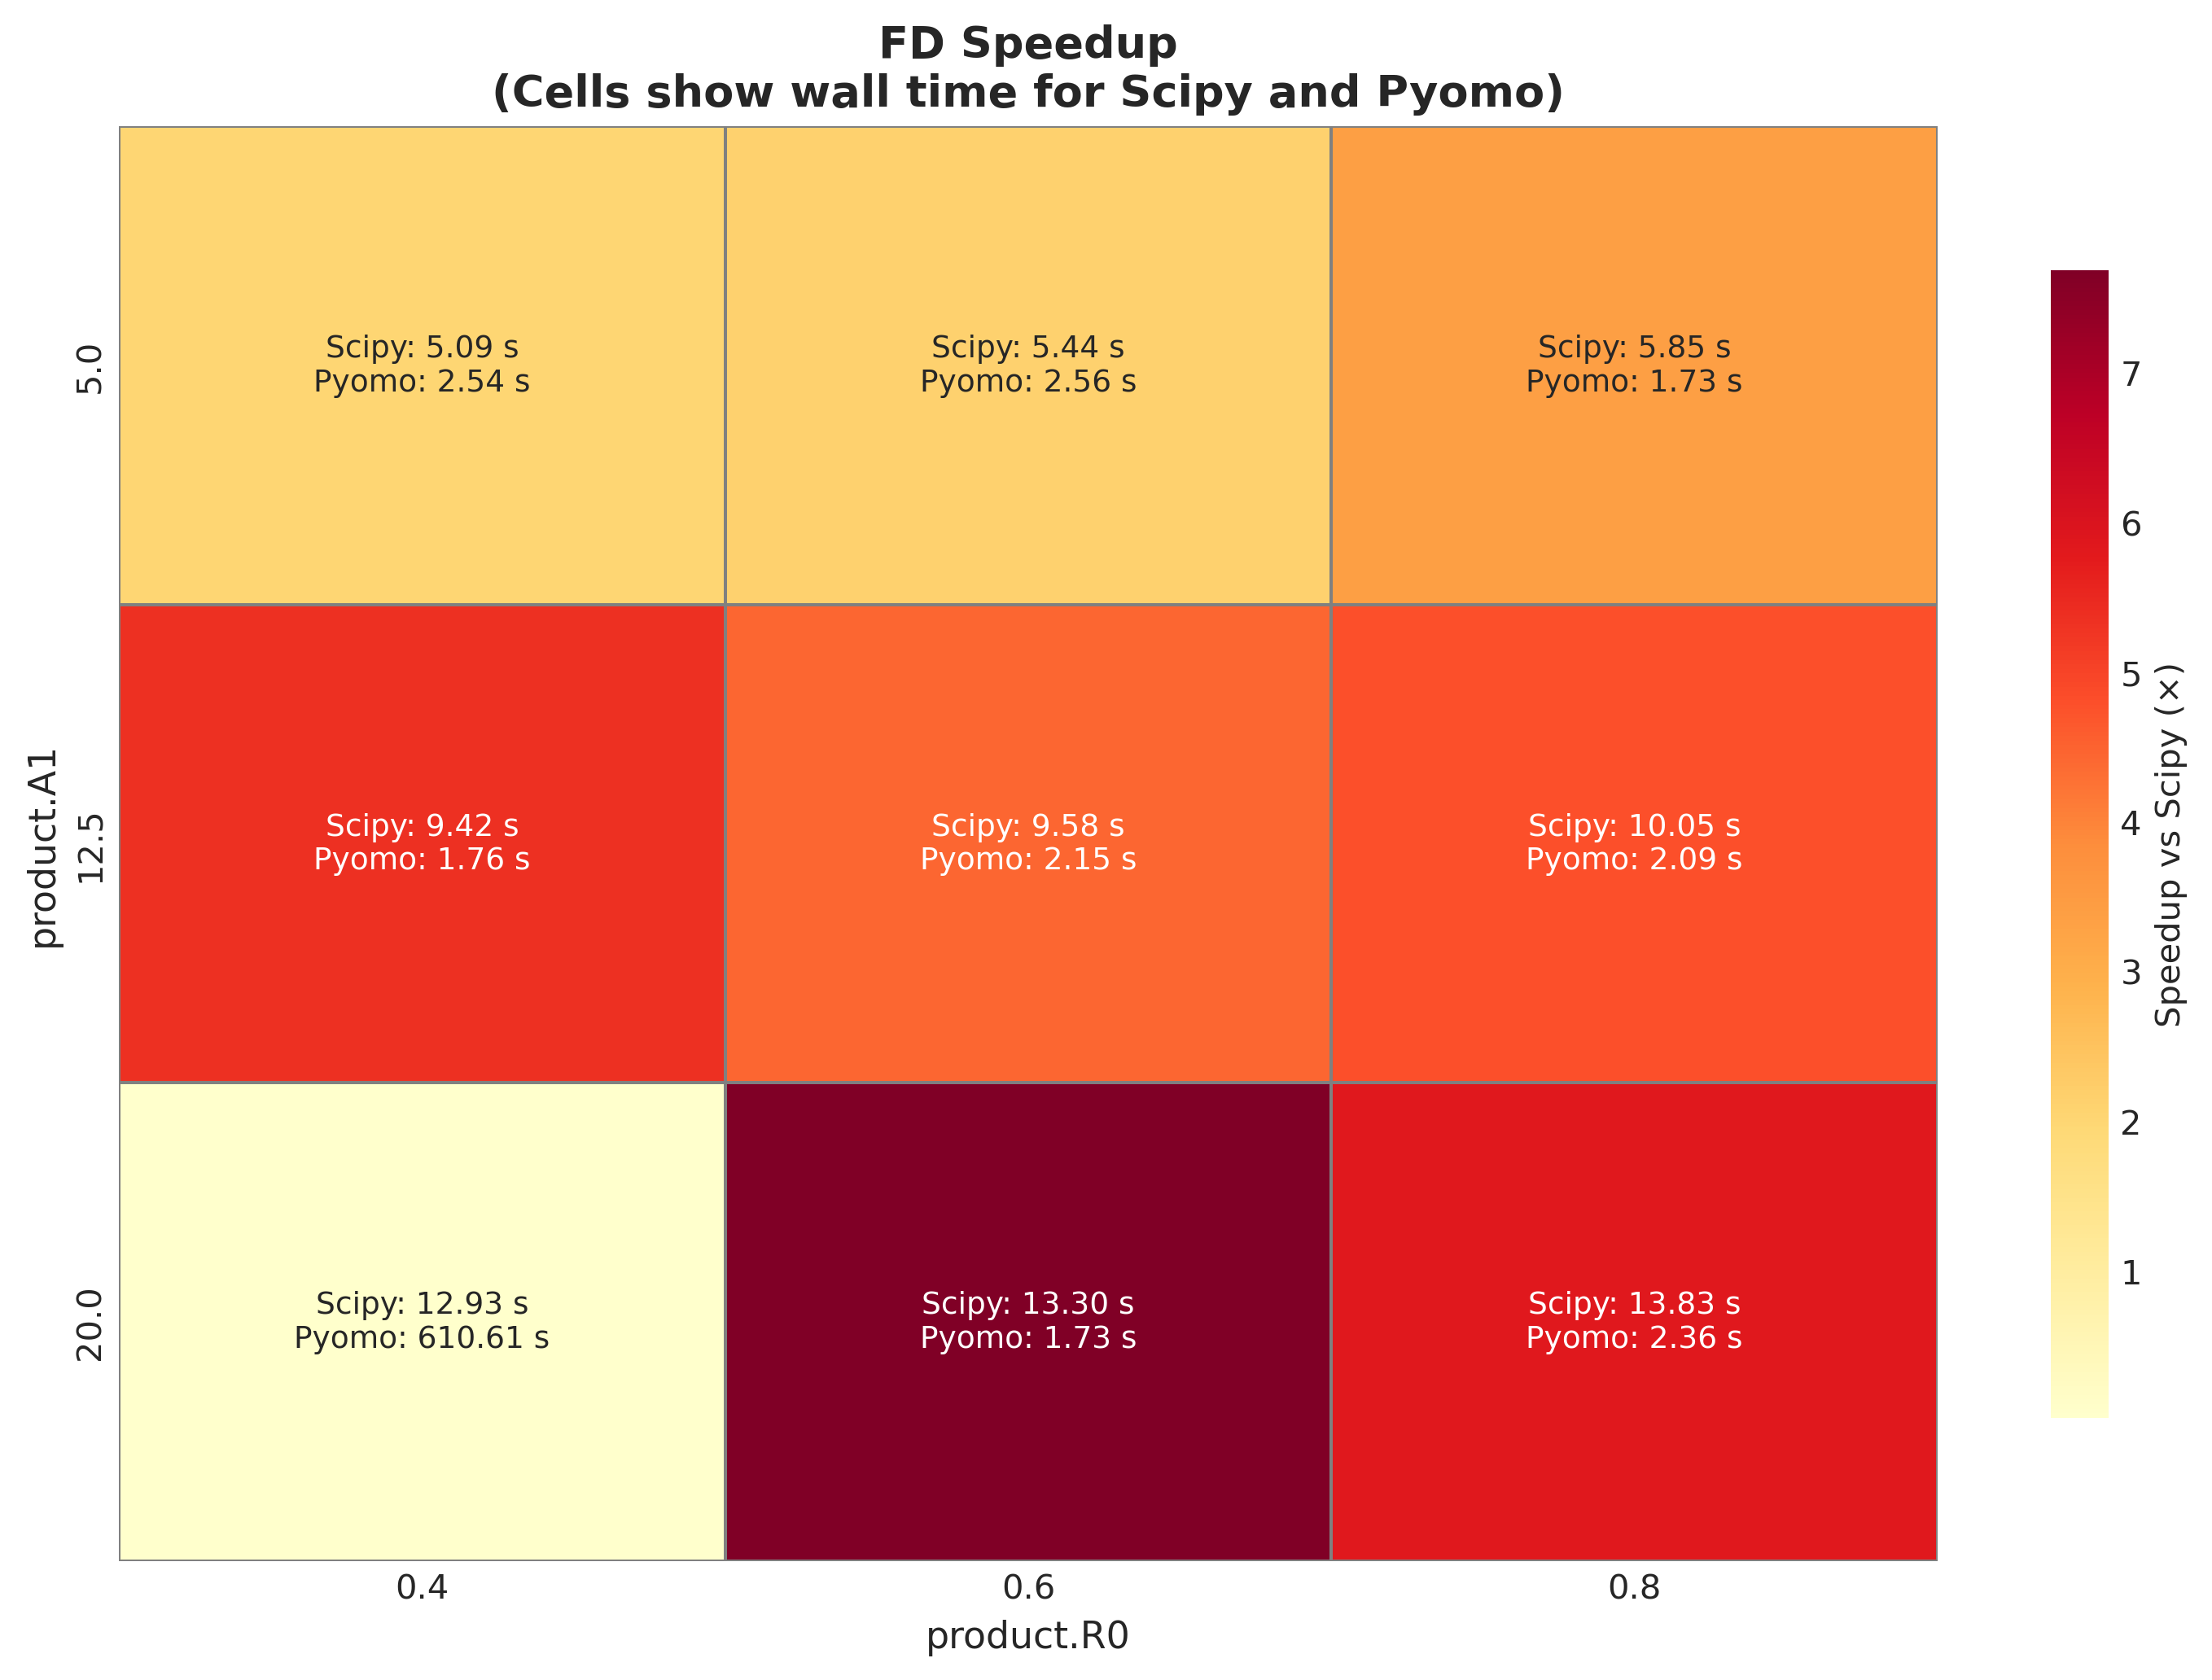

  Collocation:


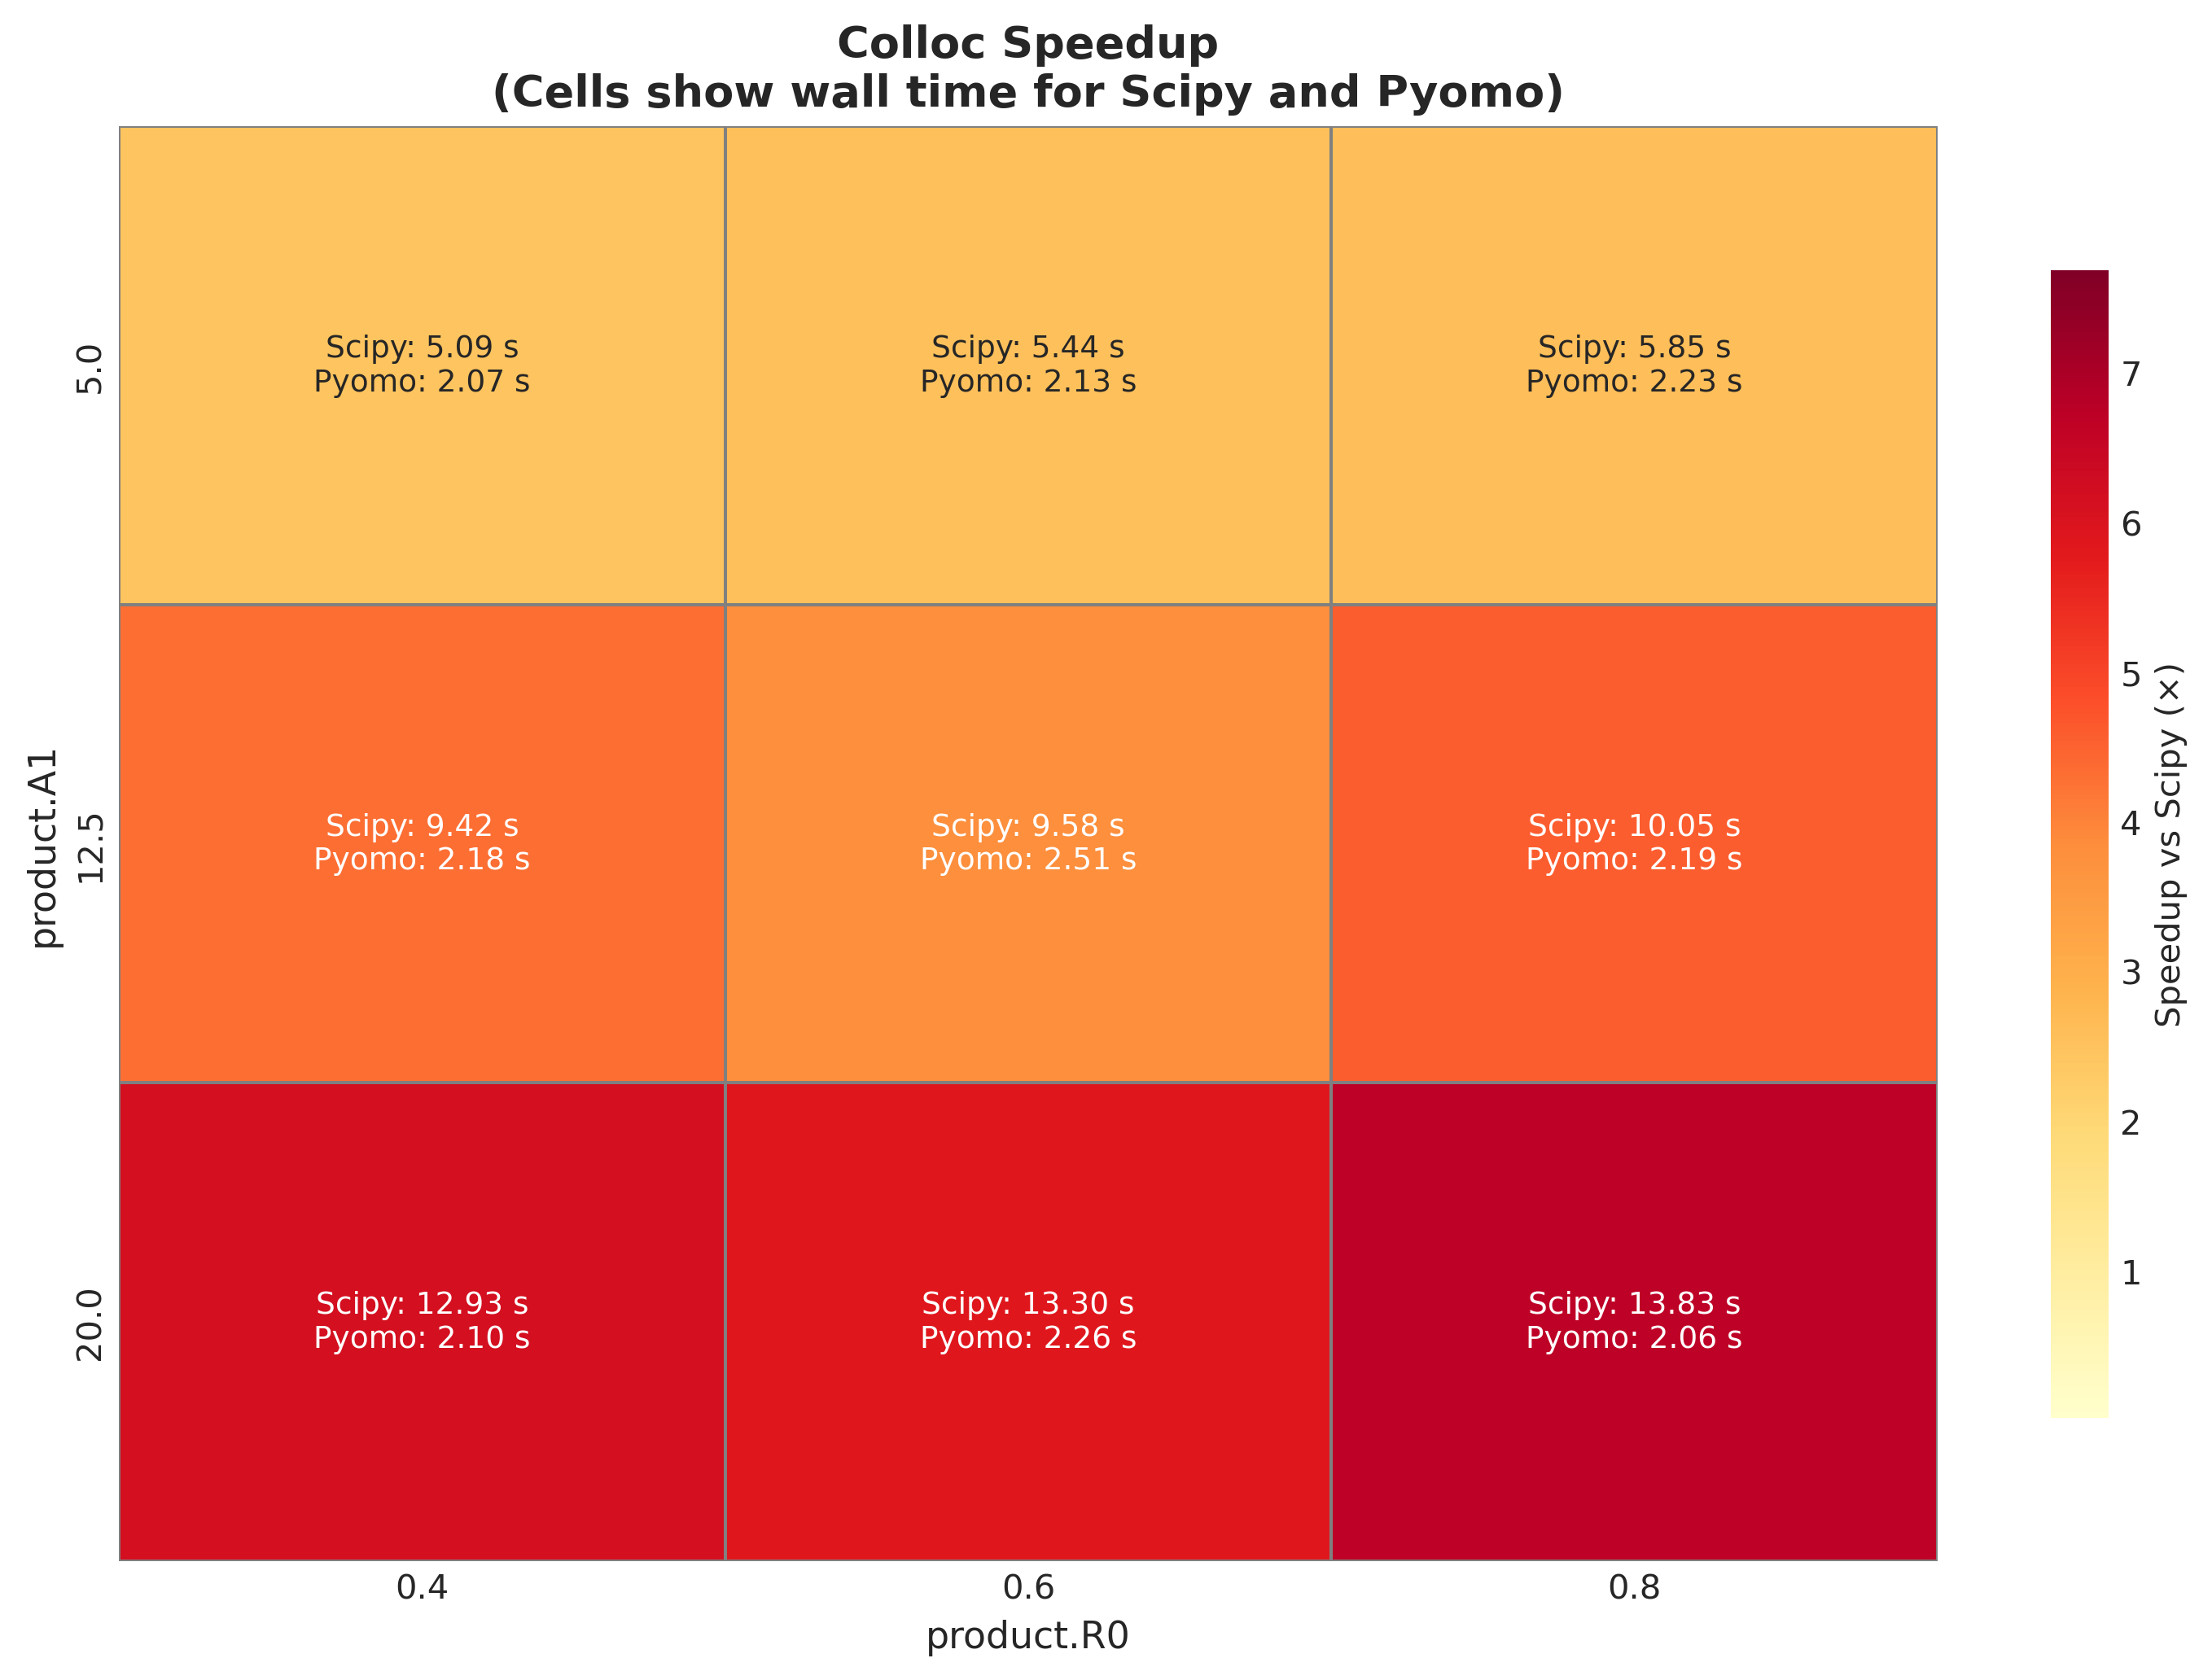

In [5]:
from IPython.display import Image, display

# Speedup heatmaps - dynamically discover which methods are present
print("✓ Speedup Heatmaps (scipy_time / pyomo_time)\n")

# Check which Pyomo methods are present in the benchmark data
for method in by_method.keys():
    if method == 'scipy':  # Skip scipy baseline
        continue
    if len(by_method[method]) > 0:
        # Capitalize method name for display (fd -> FD, colloc -> Collocation)
        method_name = {'fd': 'FD', 'colloc': 'Collocation'}.get(method, method.upper())
        speedup_file = figures_dir / f'speedup_heatmap_{method}.png'
        if speedup_file.exists():
            print(f"  {method_name}:")
            display(Image(filename=str(speedup_file)))
        else:
            print(f"  ⚠️  {method_name}: heatmap not generated")
            print(f"     Run: python scripts/generate_reports.py {get_results_dir(benchmark_version)}")


## Comparison Table

Detailed comparison for all parameter combinations.

In [6]:
import pandas as pd

table_file = processed_dir / "comparison_table.csv"
if table_file.exists():
    df = pd.read_csv(table_file)
    
    # Display with nice formatting
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    print(f"Loaded {len(df)} comparisons\n")
    display(df)
else:
    print(f"❌ Table not found: {table_file}")
    print(f"   Run: python scripts/generate_reports.py {get_results_dir(benchmark_version)}")


Loaded 18 comparisons



,param1,param2,param1_name,param2_name,method,obj_pyomo,obj_scipy,pct_diff,wall_time_scipy,wall_time_pyomo,speedup
0,0.40,5.00,product.R0,product.A1,fd,3.24,3.74,-13.44,5.09,2.54,2.01
1,0.40,12.50,product.R0,product.A1,fd,6.84,7.52,-9.11,9.42,1.76,5.35
2,0.40,20.00,product.R0,product.A1,fd,5.55,11.29,-50.82,12.93,610.61,0.02
3,0.60,5.00,product.R0,product.A1,fd,3.46,4.03,-14.29,5.44,2.56,2.12
4,0.60,12.50,product.R0,product.A1,fd,7.08,7.82,-9.40,9.58,2.15,4.45
5,0.60,20.00,product.R0,product.A1,fd,10.71,11.59,-7.61,13.30,1.73,7.69
6,0.80,5.00,product.R0,product.A1,fd,3.69,4.33,-14.91,5.85,1.73,3.38
7,0.80,12.50,product.R0,product.A1,fd,7.33,8.11,-9.64,10.05,2.09,4.80
8,0.80,20.00,product.R0,product.A1,fd,10.96,11.88,-7.75,13.83,2.36,5.85
9,0.40,5.00,product.R0,product.A1,colloc,3.24,3.74,-13.48,5.09,2.07,2.46


## Trajectory Comparison

Visualize scipy vs Pyomo trajectories over time (Tsh, Pch, dried fraction, etc.).

**Note**: Pre-generated by `generate_reports.py` for one nominal parameter combination.

✓ Nominal trajectories (scipy vs Pyomo comparison)

  Shelf Temperature:


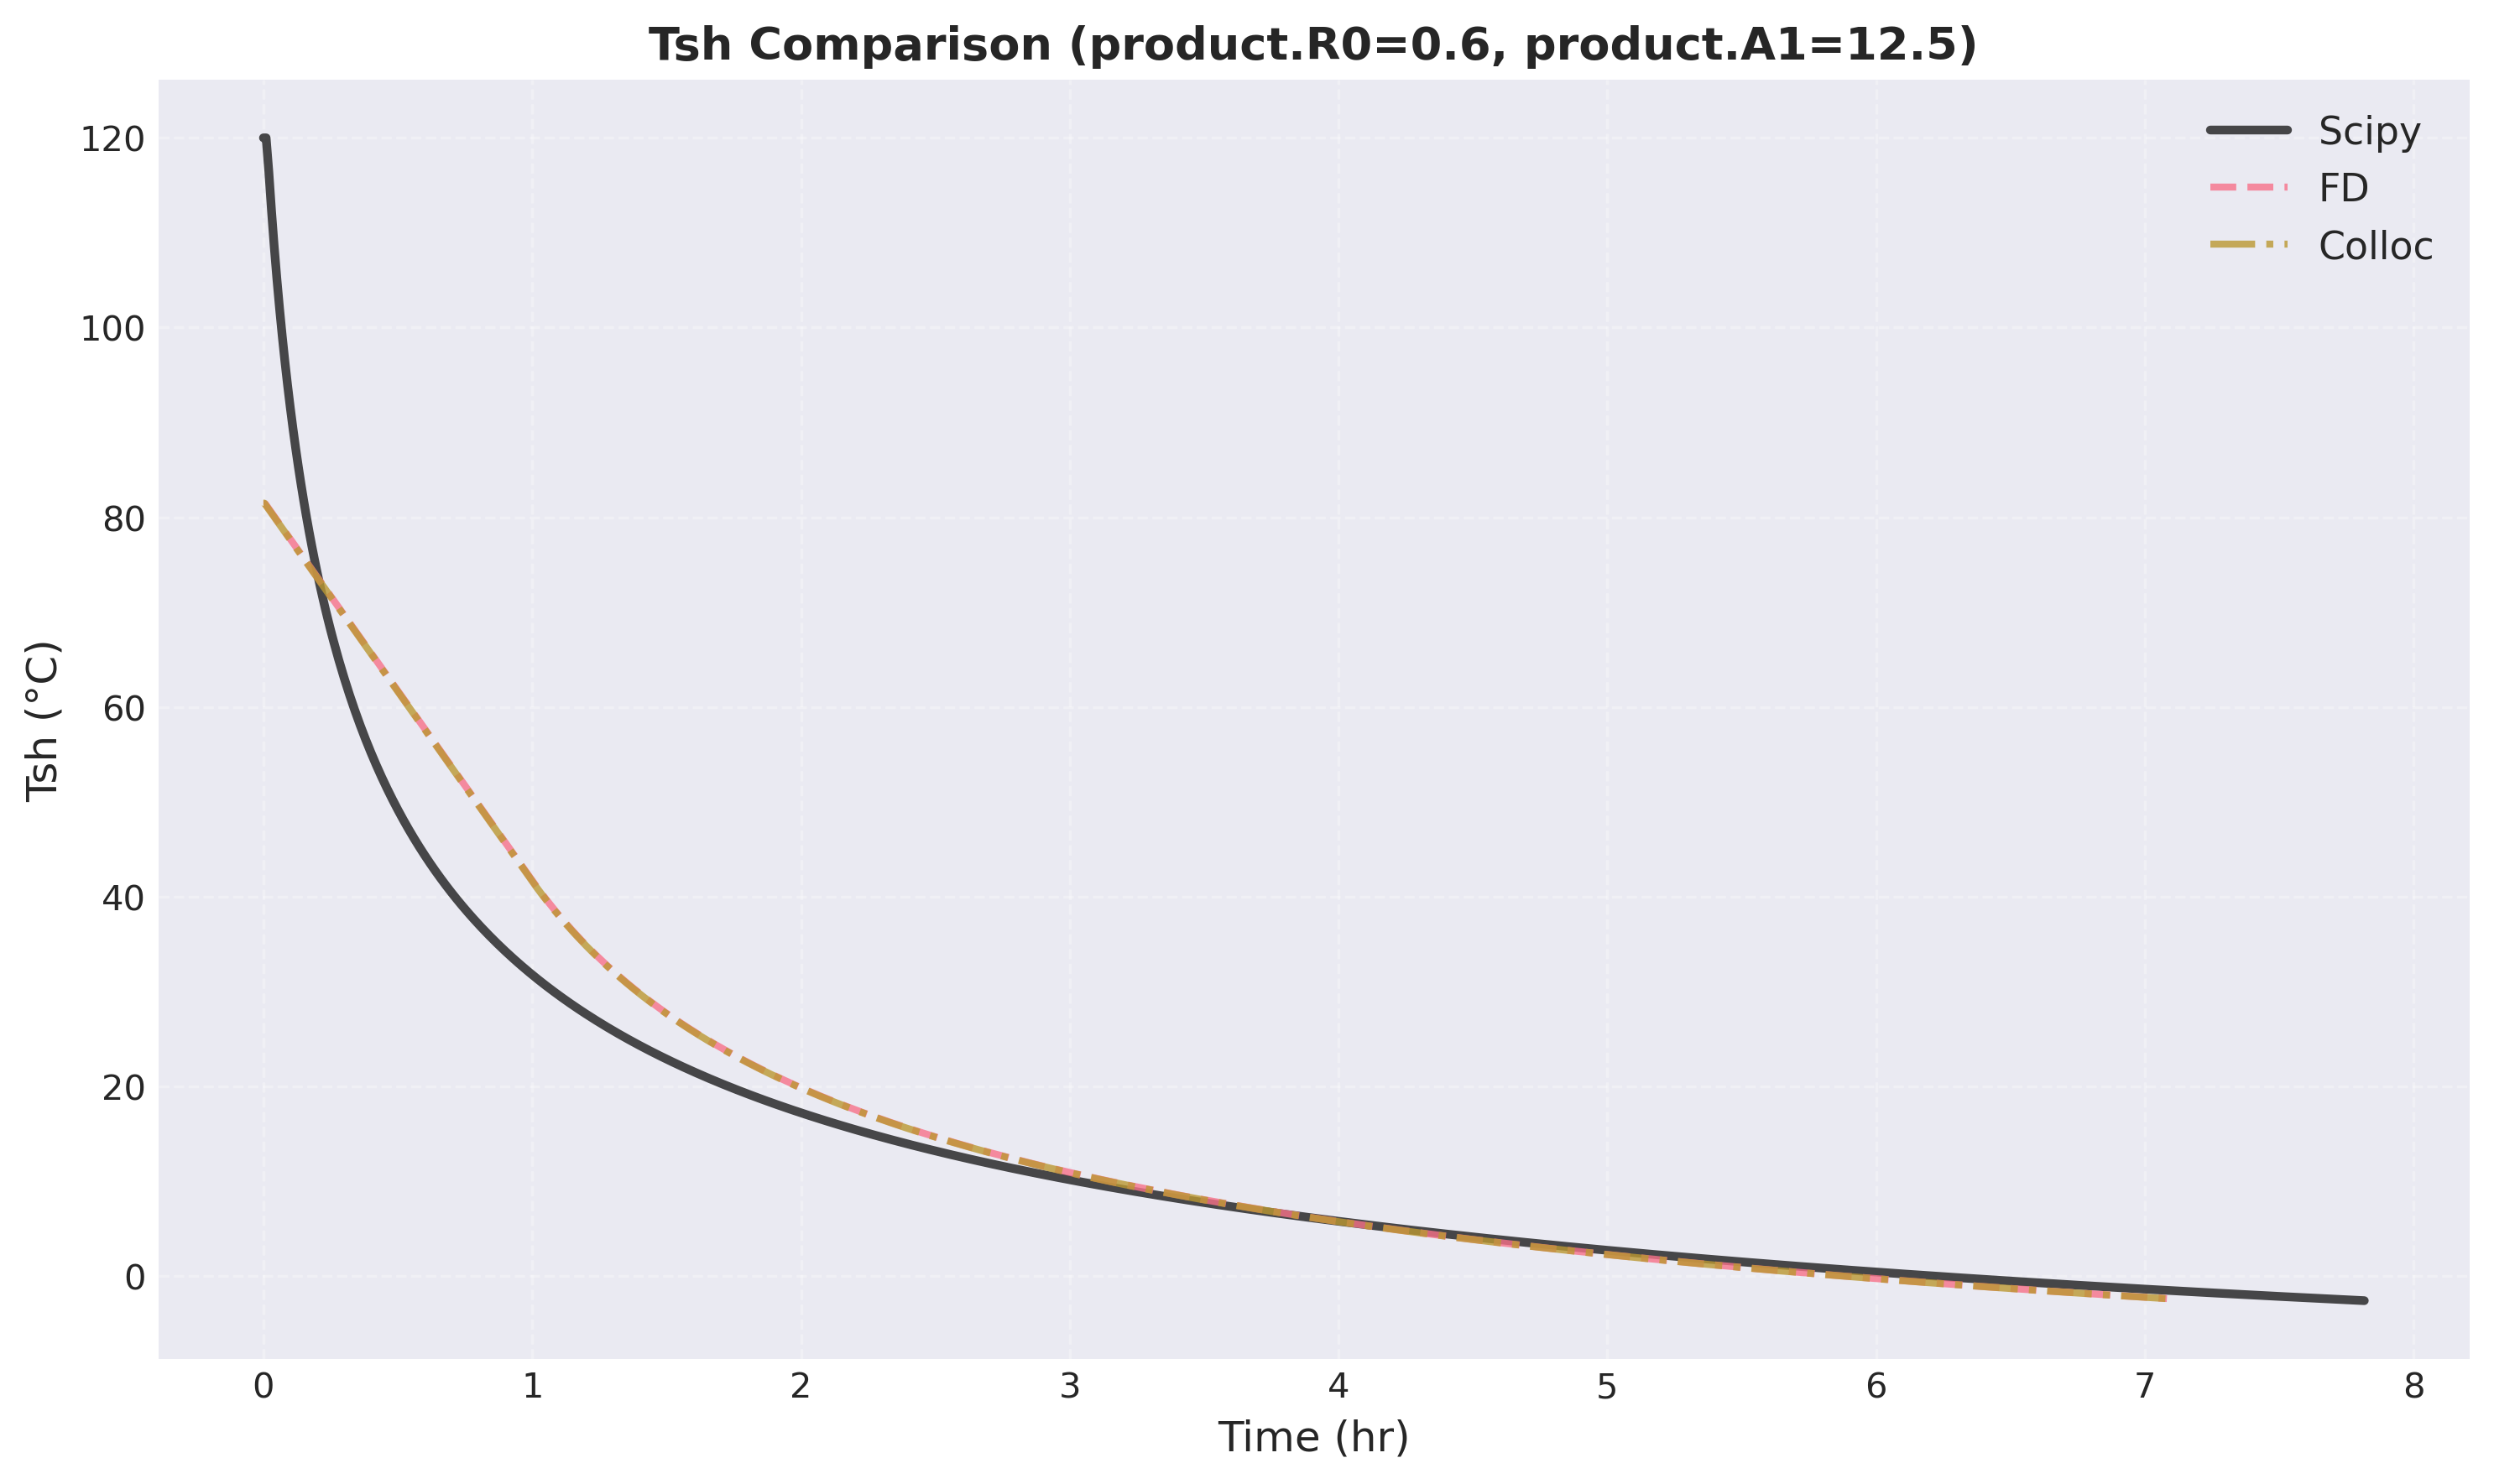

  Chamber Pressure:


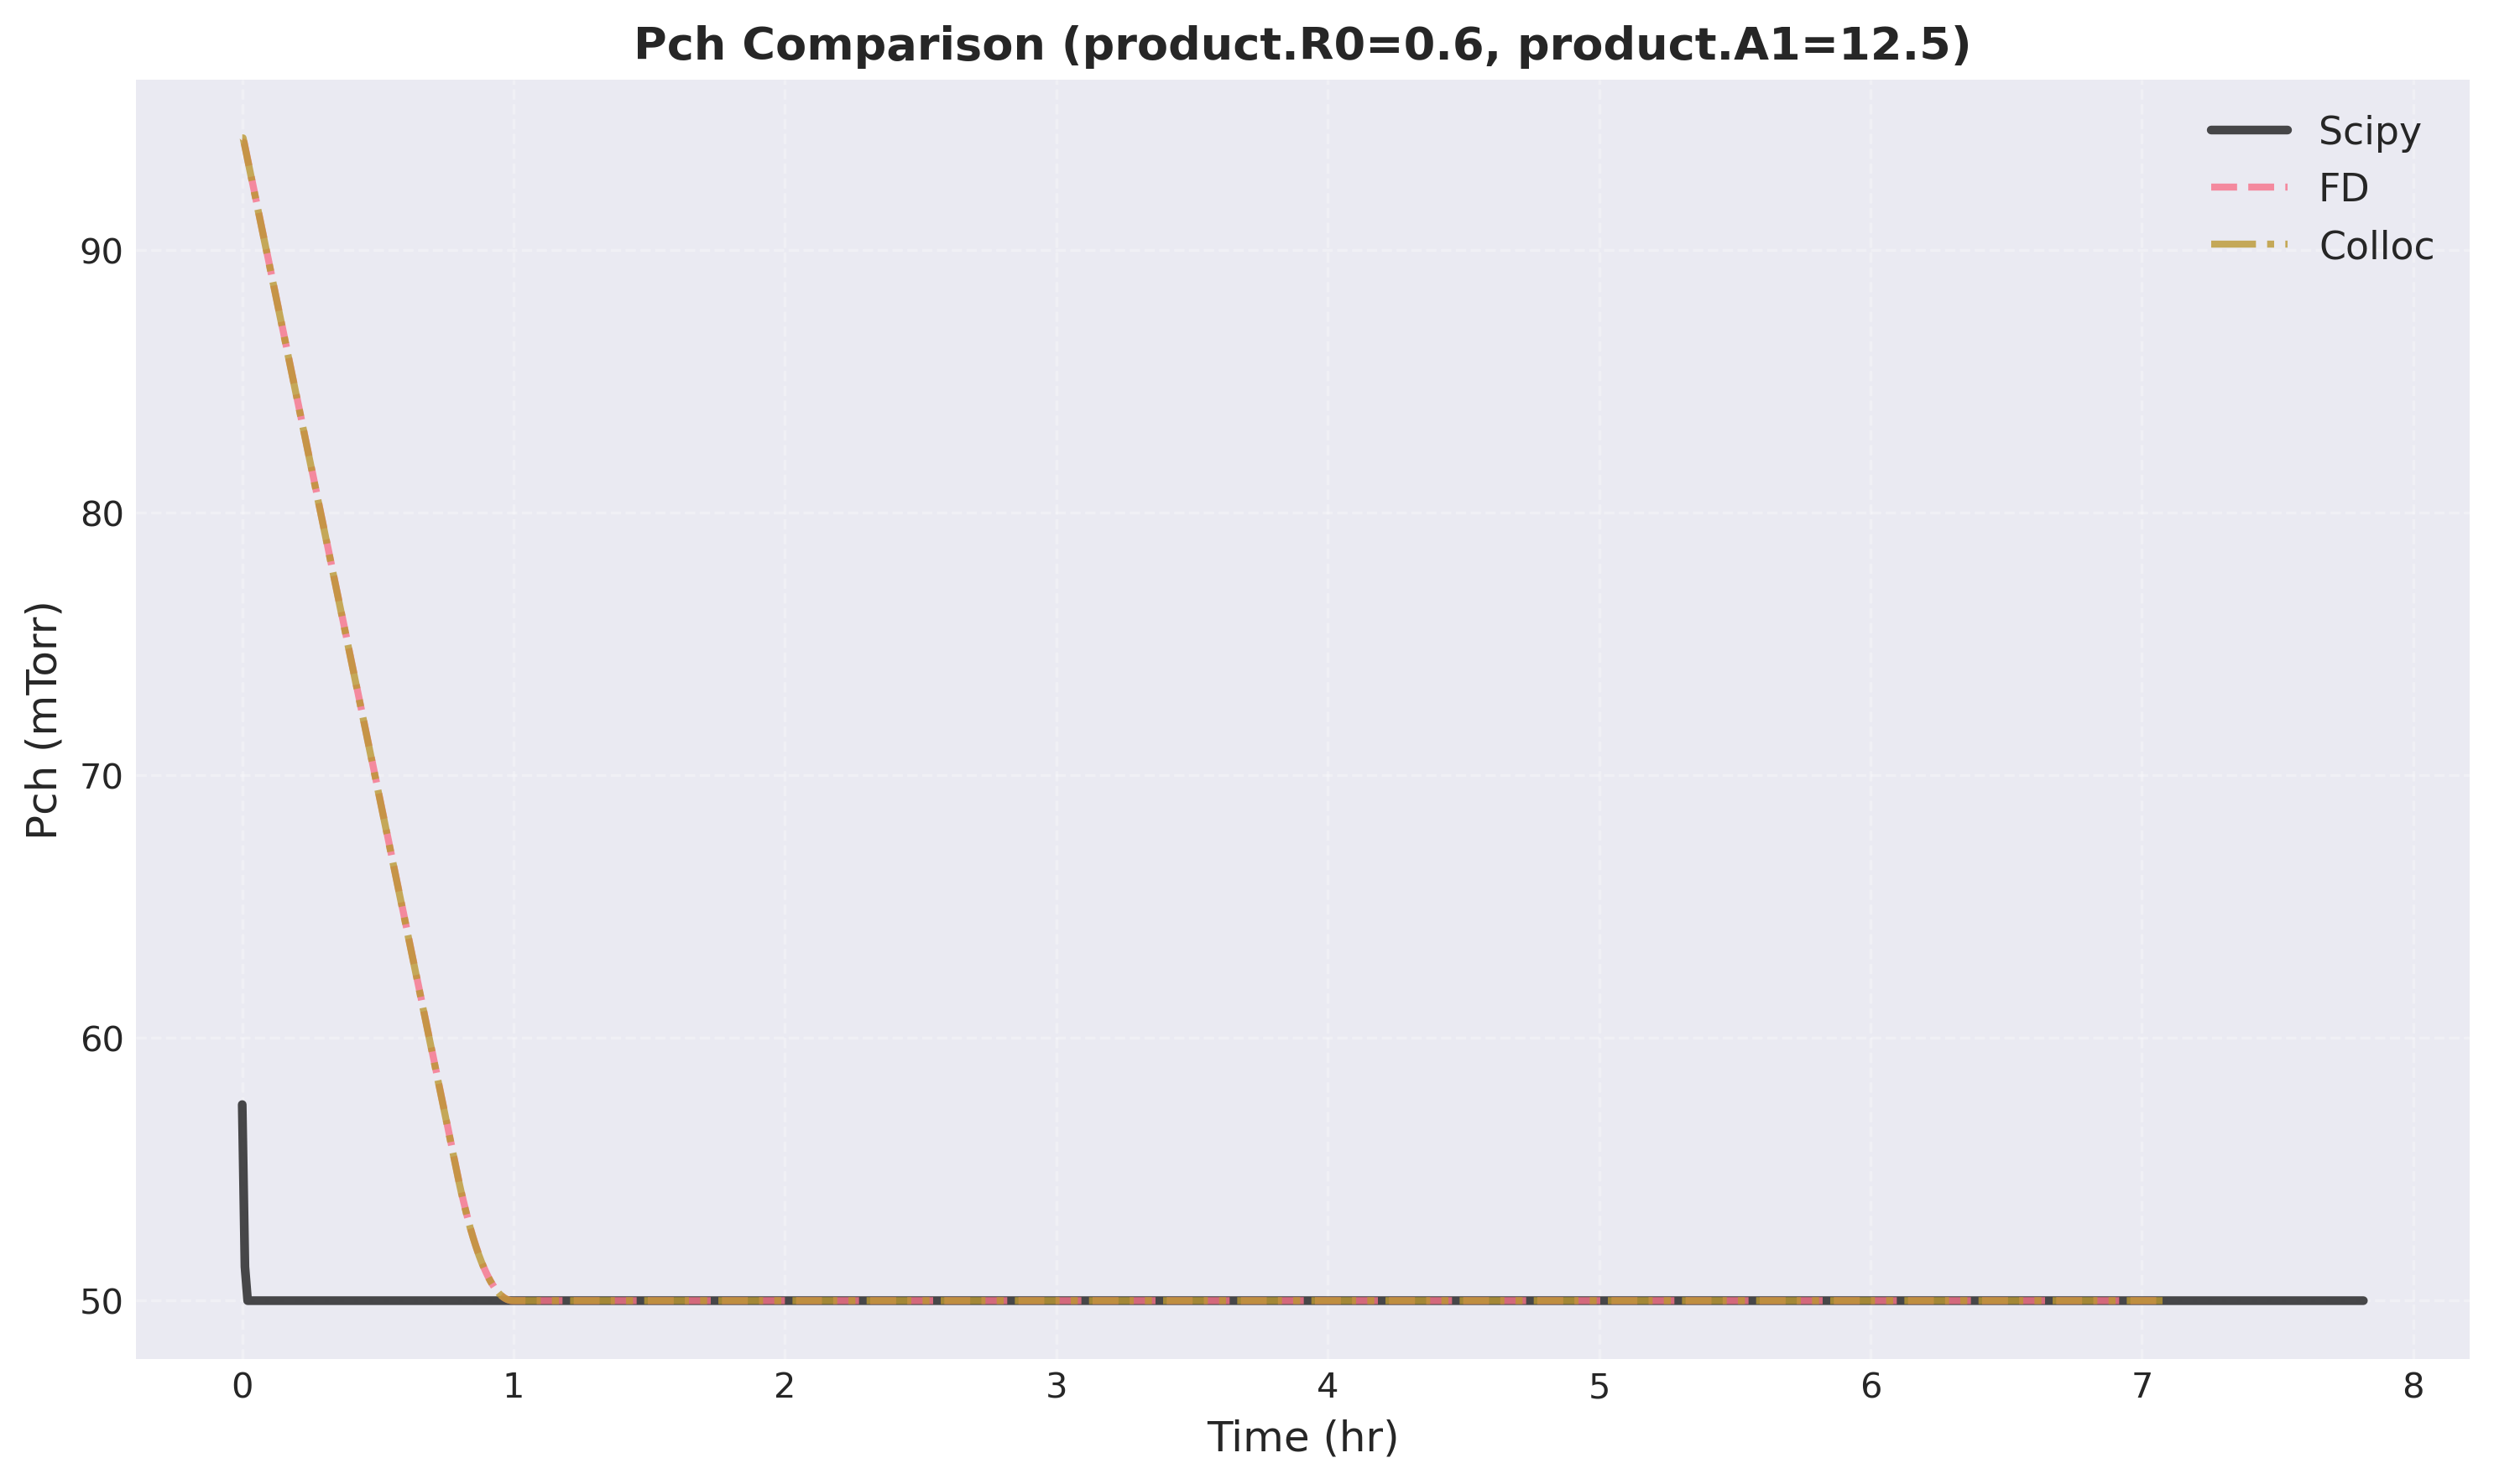

  Dried Fraction:


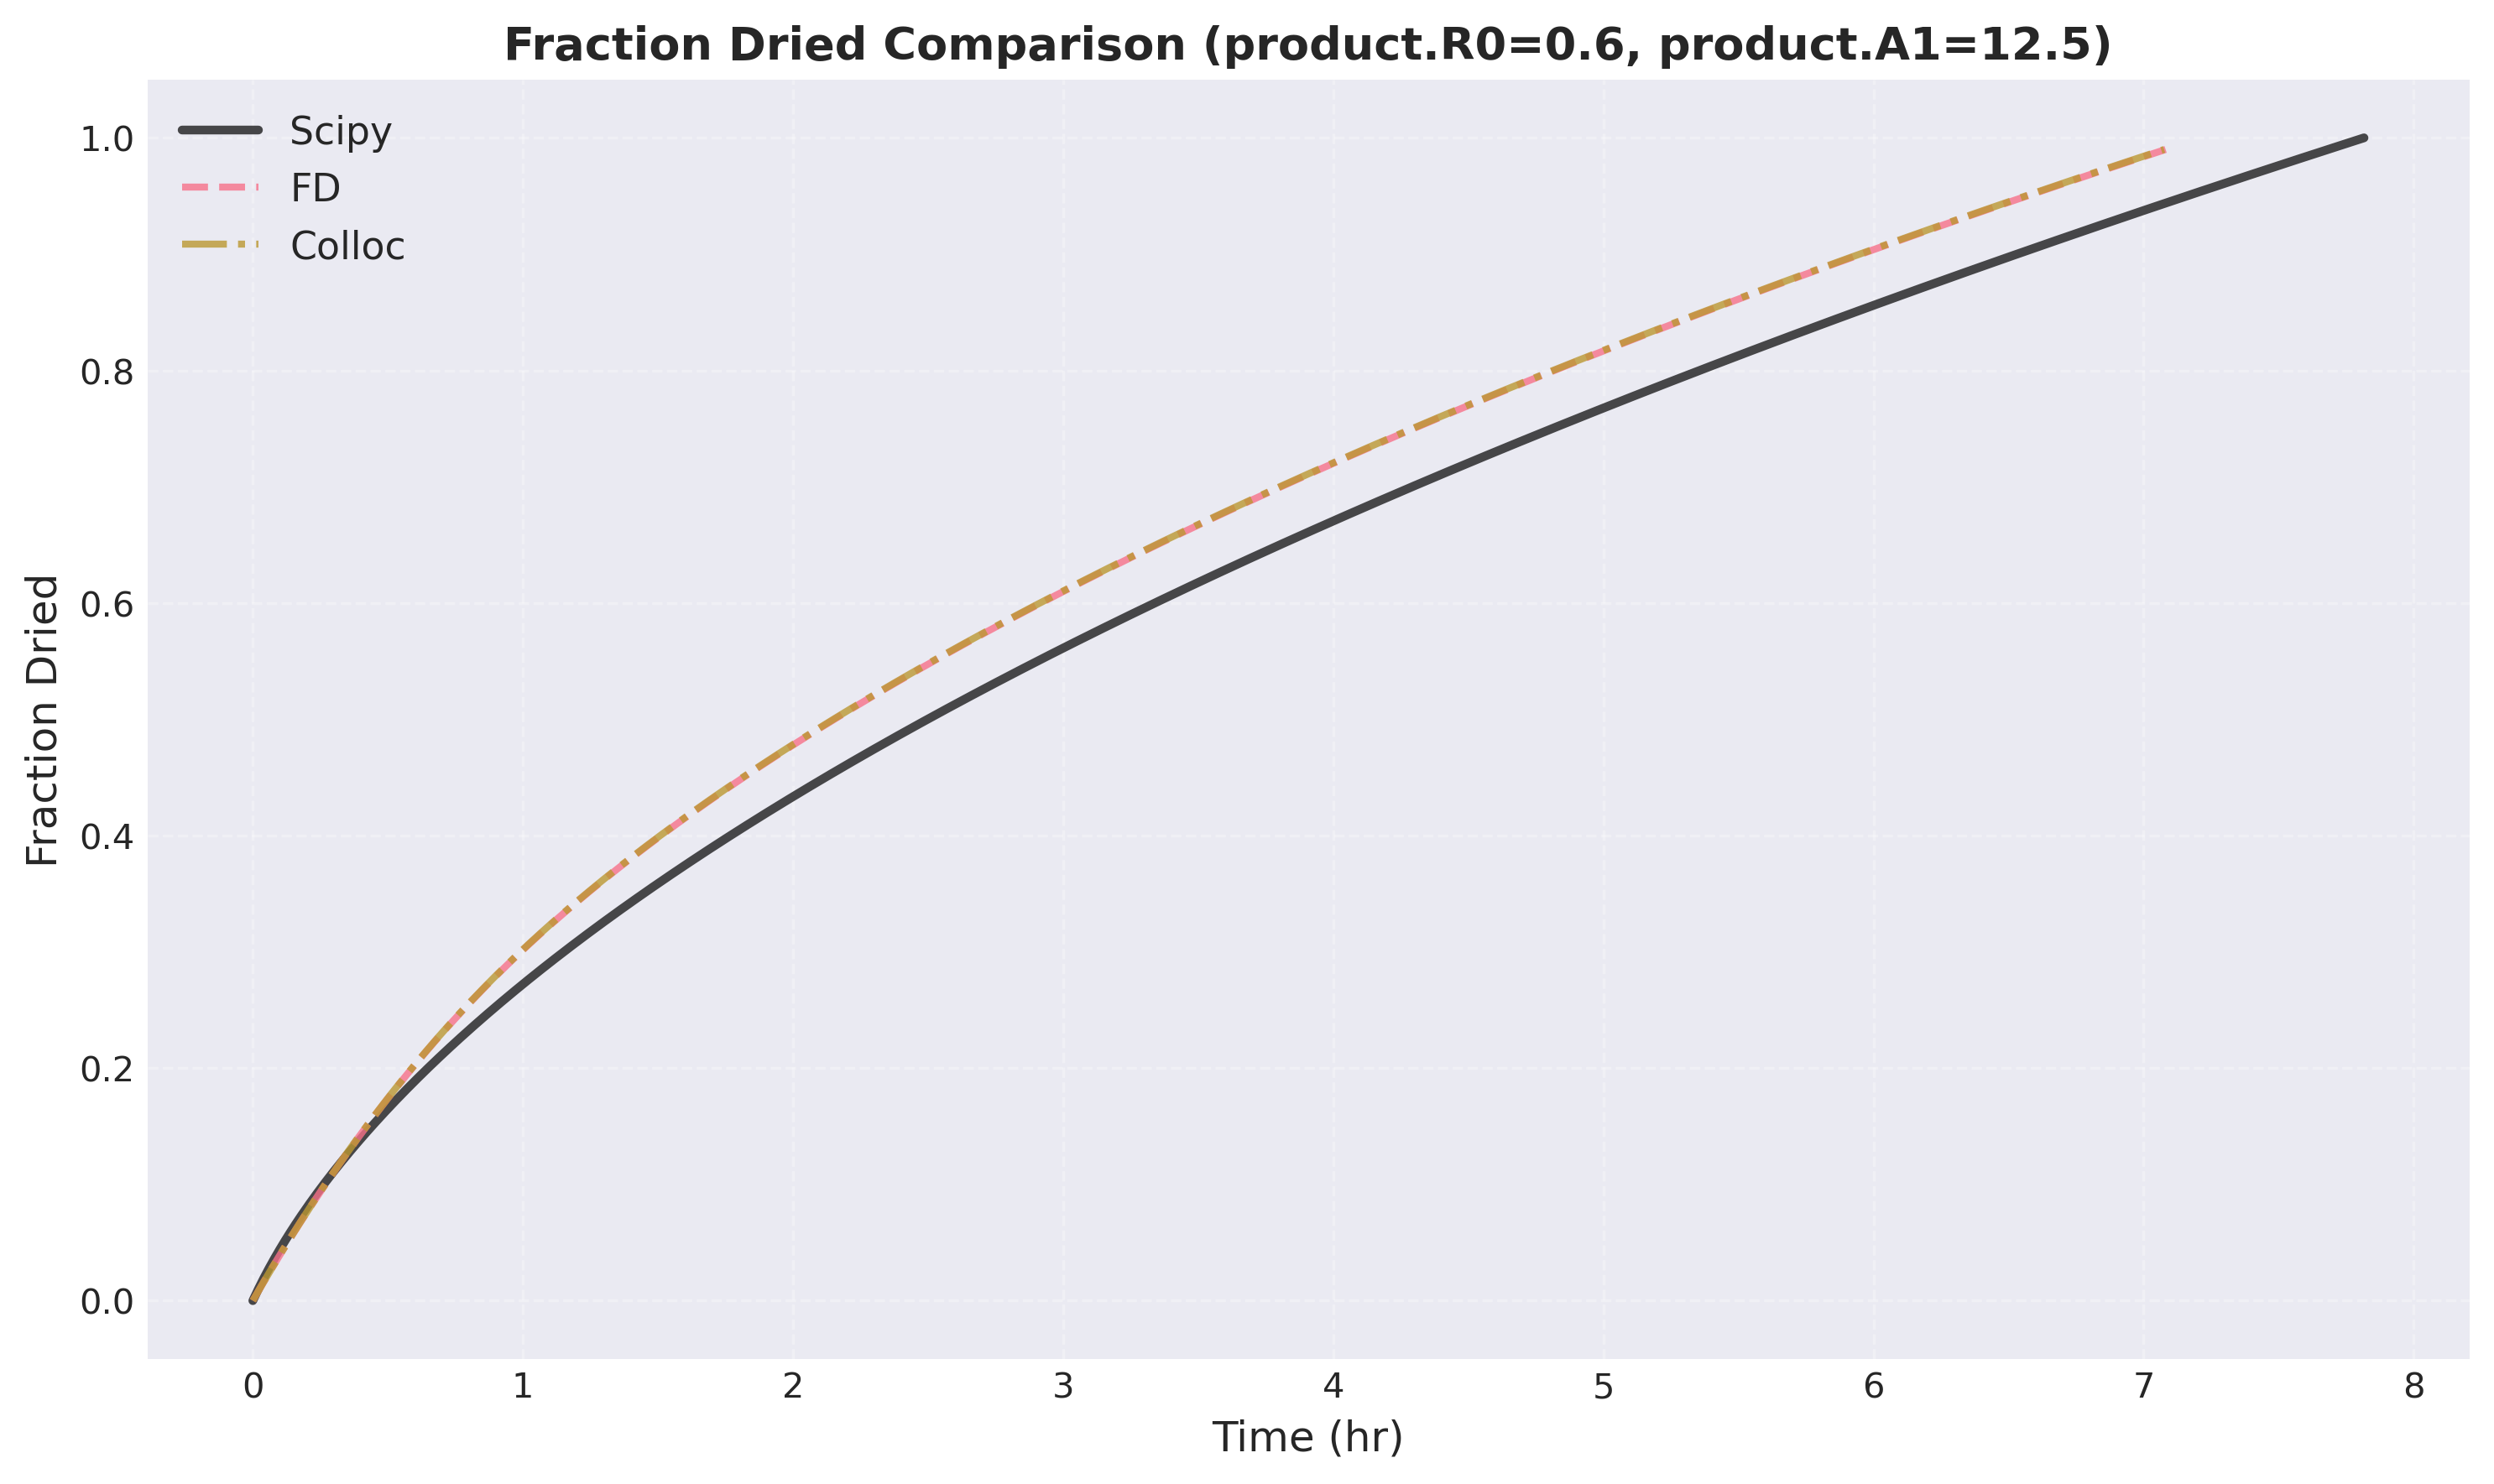


✓ Ramp Constraints (rate of change)


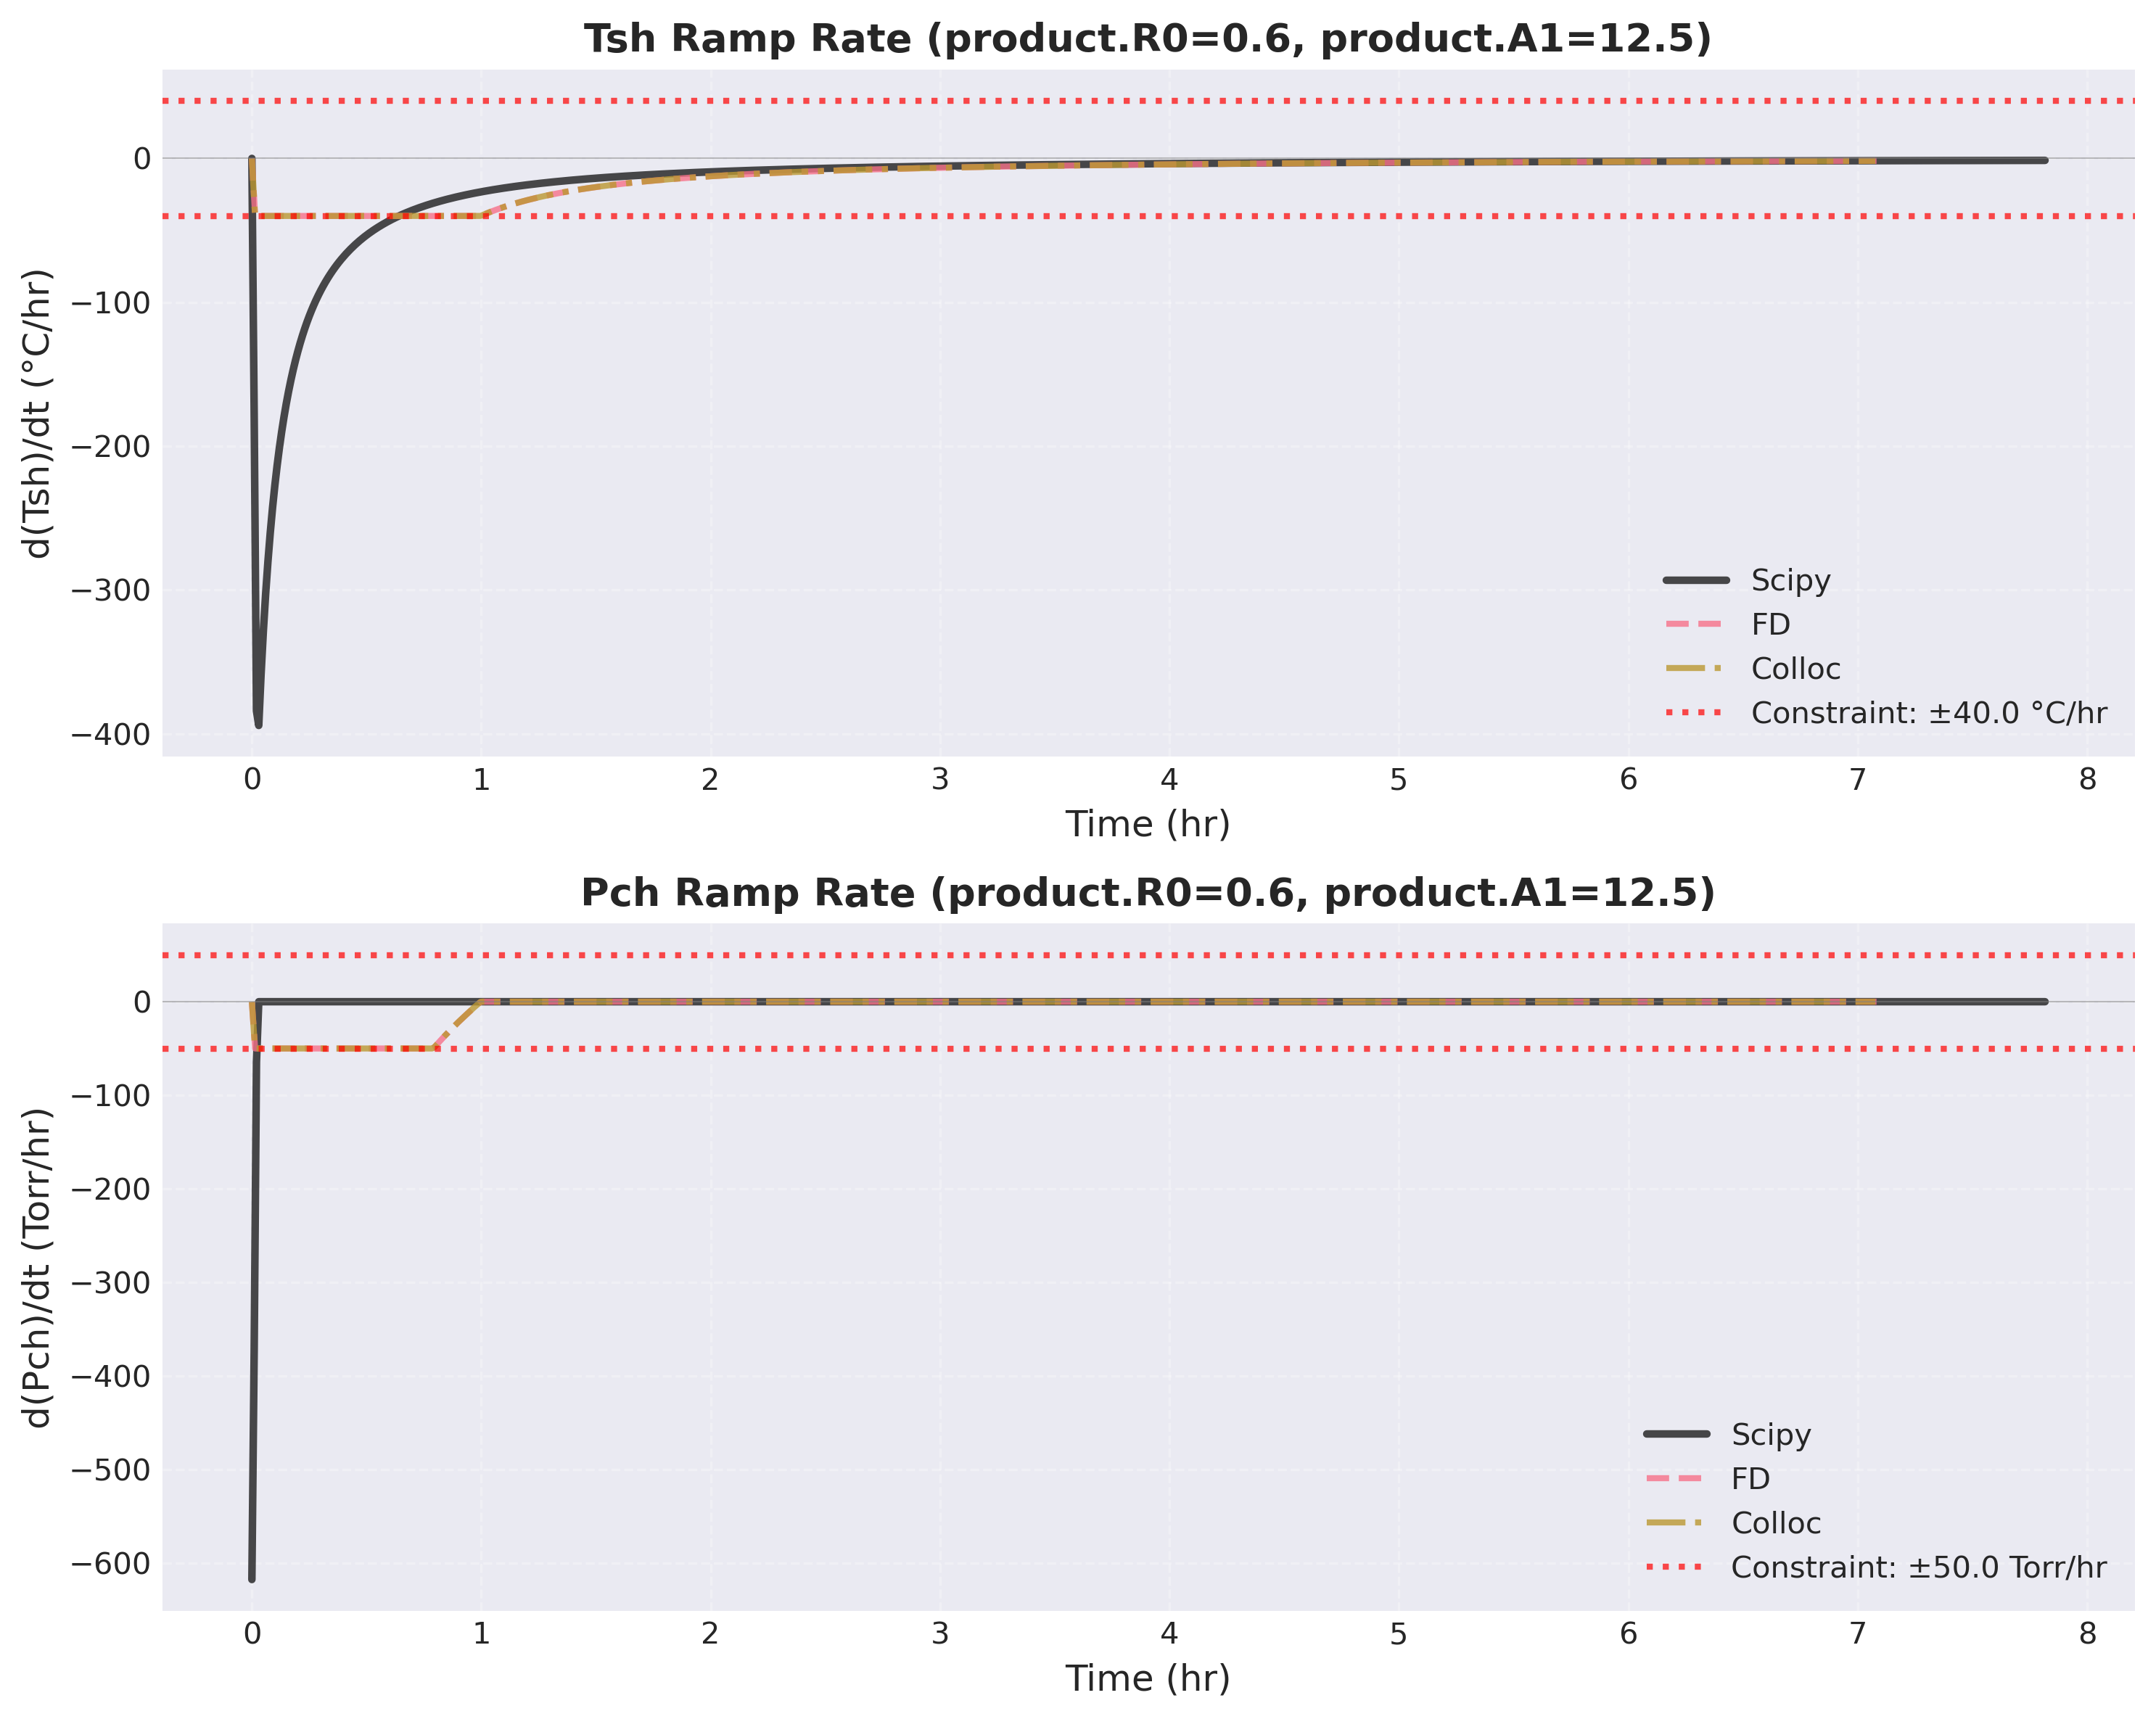

In [7]:
from IPython.display import Image, display

# Show nominal trajectories (pre-generated by generate_reports.py)
# Dynamically check which trajectory files exist based on task type
print("✓ Nominal trajectories (scipy vs Pyomo comparison)\n")

# Define all possible trajectory variables
trajectory_vars = [
    ('Shelf Temperature', 'nominal_trajectory_shelf_temperature.png'),
    ('Chamber Pressure', 'nominal_trajectory_chamber_pressure.png'),
    ('Dried Fraction', 'nominal_trajectory_dried_fraction.png'),
]

# Display trajectories that exist
for var_name, filename in trajectory_vars:
    traj_file = figures_dir / filename
    if traj_file.exists():
        print(f"  {var_name}:")
        display(Image(filename=str(traj_file)))

# Show ramp constraints plot
print("\n✓ Ramp Constraints (rate of change)")
ramp_file = figures_dir / "nominal_ramp_constraints.png"
if ramp_file.exists():
    display(Image(filename=str(ramp_file)))
else:
    print(f"  ⚠️  Ramp constraints plot not generated")
    print(f"     Run: python scripts/generate_reports.py {get_results_dir(benchmark_version)}")


## Trajectory Comparison

Visualize scipy vs Pyomo trajectories over time (Tsh, Pch, dried fraction, etc.).

Each variable is shown in a **separate figure** for better scalability and clarity.

**Note**: Pre-generated by `generate_reports.py` for one nominal parameter combination.

In [8]:
# List all available analysis outputs
print("Available analysis outputs:")
for f in sorted(figures_dir.glob("*.png")):
    print(f"  - {f.name}")

print("\n" + "="*60)
print("Note: Current infrastructure generates:")
print("  • nominal_trajectory_shelf_temperature.png - Tsh comparison")
print("  • nominal_trajectory_chamber_pressure.png - Pch comparison")
print("  • nominal_trajectory_dried_fraction.png - Dried fraction")
print("  • nominal_ramp_constraints.png - Ramp rate constraints")
print("  • objective_diff_heatmap_fd.png - FD objective difference")
print("  • objective_diff_heatmap_colloc.png - Colloc objective difference")
print("  • speedup_heatmap_fd.png - FD speedup grid")
print("  • speedup_heatmap_colloc.png - Colloc speedup grid")
print("  • speedup_barplot.png - Summary bar chart")
print("="*60)


Available analysis outputs:
  - nominal_ramp_constraints.png
  - nominal_trajectory_chamber_pressure.png
  - nominal_trajectory_dried_fraction.png
  - nominal_trajectory_shelf_temperature.png
  - objective_diff_heatmap_colloc.png
  - objective_diff_heatmap_fd.png
  - speedup_barplot.png
  - speedup_heatmap_colloc.png
  - speedup_heatmap_fd.png

Note: Current infrastructure generates:
  • nominal_trajectory_shelf_temperature.png - Tsh comparison
  • nominal_trajectory_chamber_pressure.png - Pch comparison
  • nominal_trajectory_dried_fraction.png - Dried fraction
  • nominal_ramp_constraints.png - Ramp rate constraints
  • objective_diff_heatmap_fd.png - FD objective difference
  • objective_diff_heatmap_colloc.png - Colloc objective difference
  • speedup_heatmap_fd.png - FD speedup grid
  • speedup_heatmap_colloc.png - Colloc speedup grid
  • speedup_barplot.png - Summary bar chart


## Regenerate Analysis

If you modified parameters or want to regenerate analysis, run this cell.

✓ Speedup summary


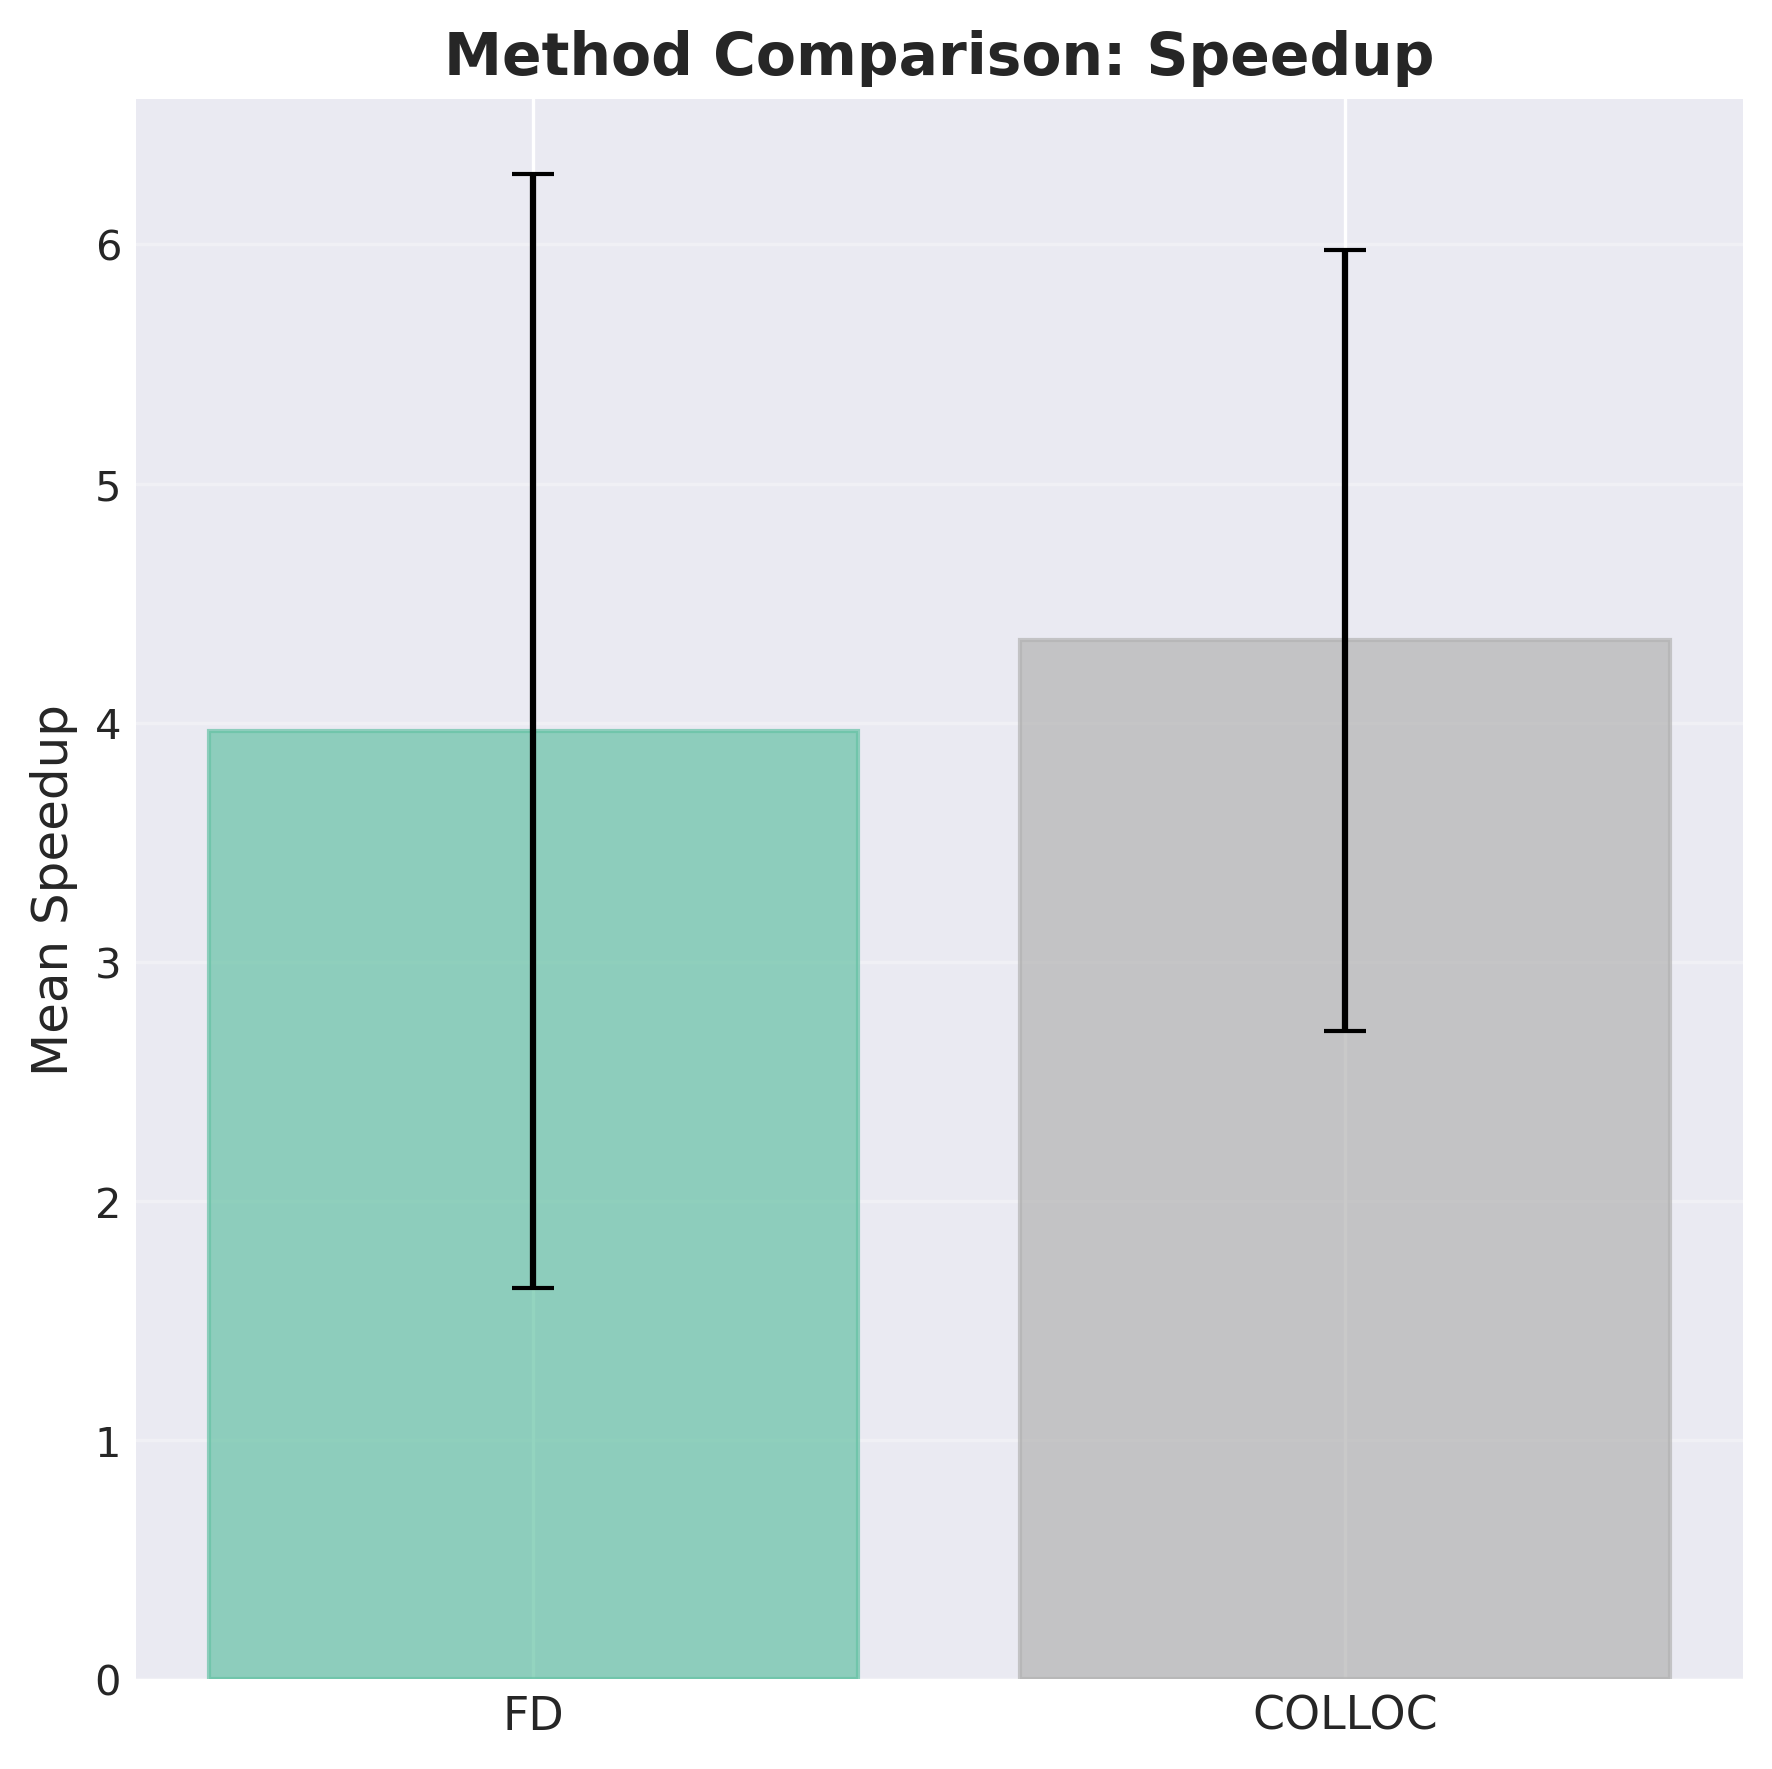

In [9]:
from IPython.display import Image, display

# Show speedup bar plot
barplot_file = figures_dir / "speedup_barplot.png"
if barplot_file.exists():
    print("✓ Speedup summary")
    display(Image(filename=str(barplot_file)))
else:
    print(f"❌ Barplot not found: {barplot_file}")
    print(f"   Run: python scripts/generate_reports.py {get_results_dir(benchmark_version)}")


---

## Quick Workflow for New Benchmarks

### Single-Task Benchmark
**1. Generate benchmark data:**
```bash
python benchmarks/scripts/grid_cli.py generate \
    --task Tsh \
    --scenario baseline \
    --vary product.R0=0.4,0.8 \
    --vary product.A1=5,20 \
    --methods fd,colloc \
    --n-elements 1000 \
    --out benchmarks/results/my_benchmark/raw/Tsh_2x2.jsonl
```

**2. Run analysis:**
```bash
python benchmarks/scripts/generate_reports.py \
    benchmarks/results/my_benchmark/raw \
    --output benchmarks/results/my_benchmark
```

**3. View in notebook:**
- Set `benchmark_folder = "my_benchmark"`
- Run all cells

### Multi-Task Benchmark (Tsh, Pch, both)
**1. Generate all tasks:**
```bash
# Generate Tsh optimization
python grid_cli.py generate --task Tsh ... --out results/comprehensive/raw/Tsh_3x3.jsonl

# Generate Pch optimization  
python grid_cli.py generate --task Pch ... --out results/comprehensive/raw/Pch_3x3.jsonl

# Generate simultaneous Tsh+Pch optimization
python grid_cli.py generate --task both ... --out results/comprehensive/raw/both_3x3.jsonl
```

**2. Analyze all tasks:**
```bash
python generate_reports.py benchmarks/results/comprehensive/raw \
    --output benchmarks/results/comprehensive
```

**3. View in notebook:**
- Set `benchmark_folder = "comprehensive"`
- The notebook detects all 3 tasks automatically
- Select which task to view: `selected_task = 'Tsh'`, `'Pch'`, or `'both'`
- Re-run cells to switch between tasks

### Key Features:
- ✅ **Single folder, multiple tasks** - One benchmark can contain Tsh, Pch, and both
- ✅ **Auto-detection** - Notebook finds all tasks automatically
- ✅ **Easy switching** - Change `selected_task` to view different optimizations
- ✅ **Scales to any methods** - Works with fd, colloc, rk4, bdf, etc.
- ✅ **Labeled heatmaps** - "Scipy: X / Pyomo: Y" annotations with units
- ✅ **Dynamic trajectories** - All detected methods shown automatically